<a href="https://colab.research.google.com/github/egonik-unlp/random_projects/blob/master/nns/evaluacion_cnns_joaco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
!mkdir /root/.kaggle
!wget https://raw.githubusercontent.com/egonik-unlp/random_projects/master/data_analytics/kaggle.json -P /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pip install -q kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists
--2021-06-17 14:19:33--  https://raw.githubusercontent.com/egonik-unlp/random_projects/master/data_analytics/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68 [text/plain]
Saving to: ‘/root/.kaggle/kaggle.json’

kaggle.json         100%[===================>]      68  --.-KB/s    in 0s      

2021-06-17 14:19:33 (4.88 MB/s) - ‘/root/.kaggle/kaggle.json’ saved [68/68]



In [32]:
modelos=[]
path='/content/drive/MyDrive/cnn_japan'
for root, dirs, files in os.walk(path):
  for name in files:
    if name[-3:]=='.h5':
        modelos.append(keras.models.load_model(os.path.join(root,name)))  

In [39]:
%cd /content/
!kaggle datasets download anokas/kuzushiji

/content
100% 571M/571M [00:04<00:00, 170MB/s]



In [41]:
%%%capture
!unzip kuzushiji.zip -d /content/dataset

In [33]:
%%capture

!pip install japanize-matplotlib
!sudo apt-get install fonts-takao-mincho fonts-takao-gothic fonts-takao-pgothic
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='TakaoPGothic')
import japanize_matplotlib
plt.rcParams.update({"font.size":21})
import cv2

In [34]:
!git clone https://github.com/egonik-unlp/random_projects.git


Cloning into 'random_projects'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (187/187), done.
remote: Total 236 (delta 85), reused 160 (delta 37), pack-reused 0
Receiving objects: 100% (236/236), 28.09 MiB | 30.47 MiB/s, done.
Resolving deltas: 100% (85/85), done.


/content/random_projects/prueba_cnn


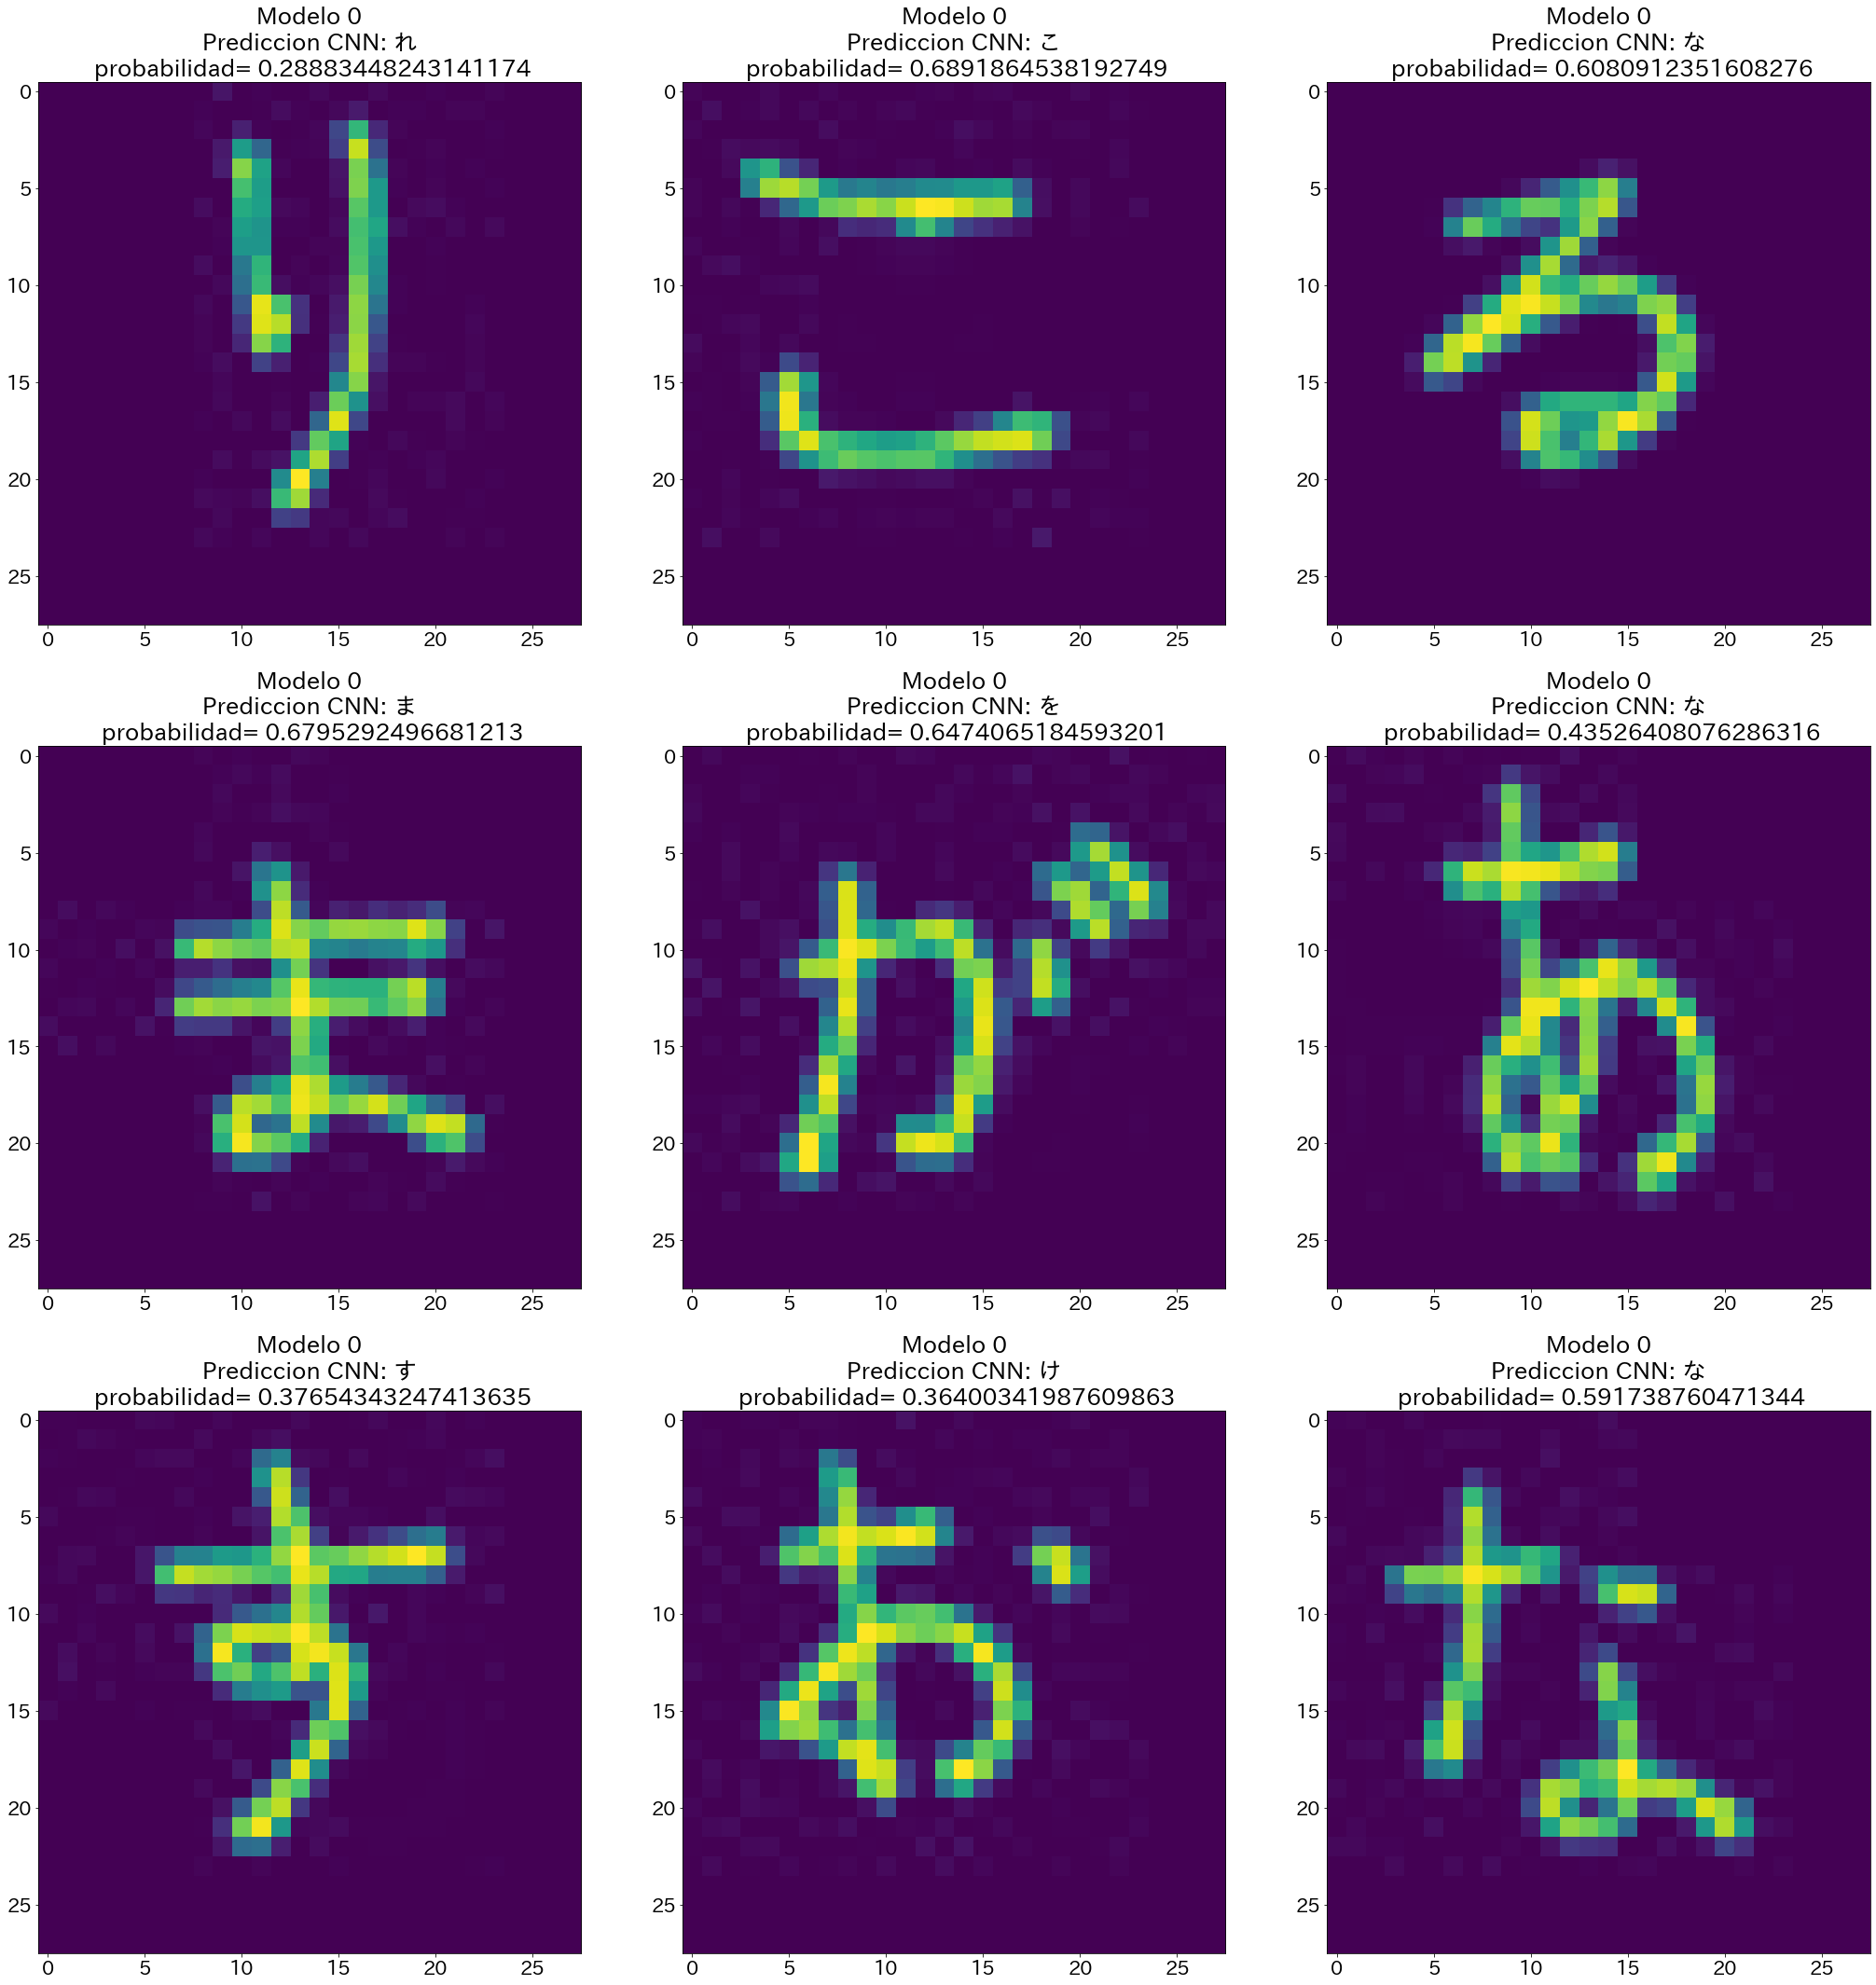

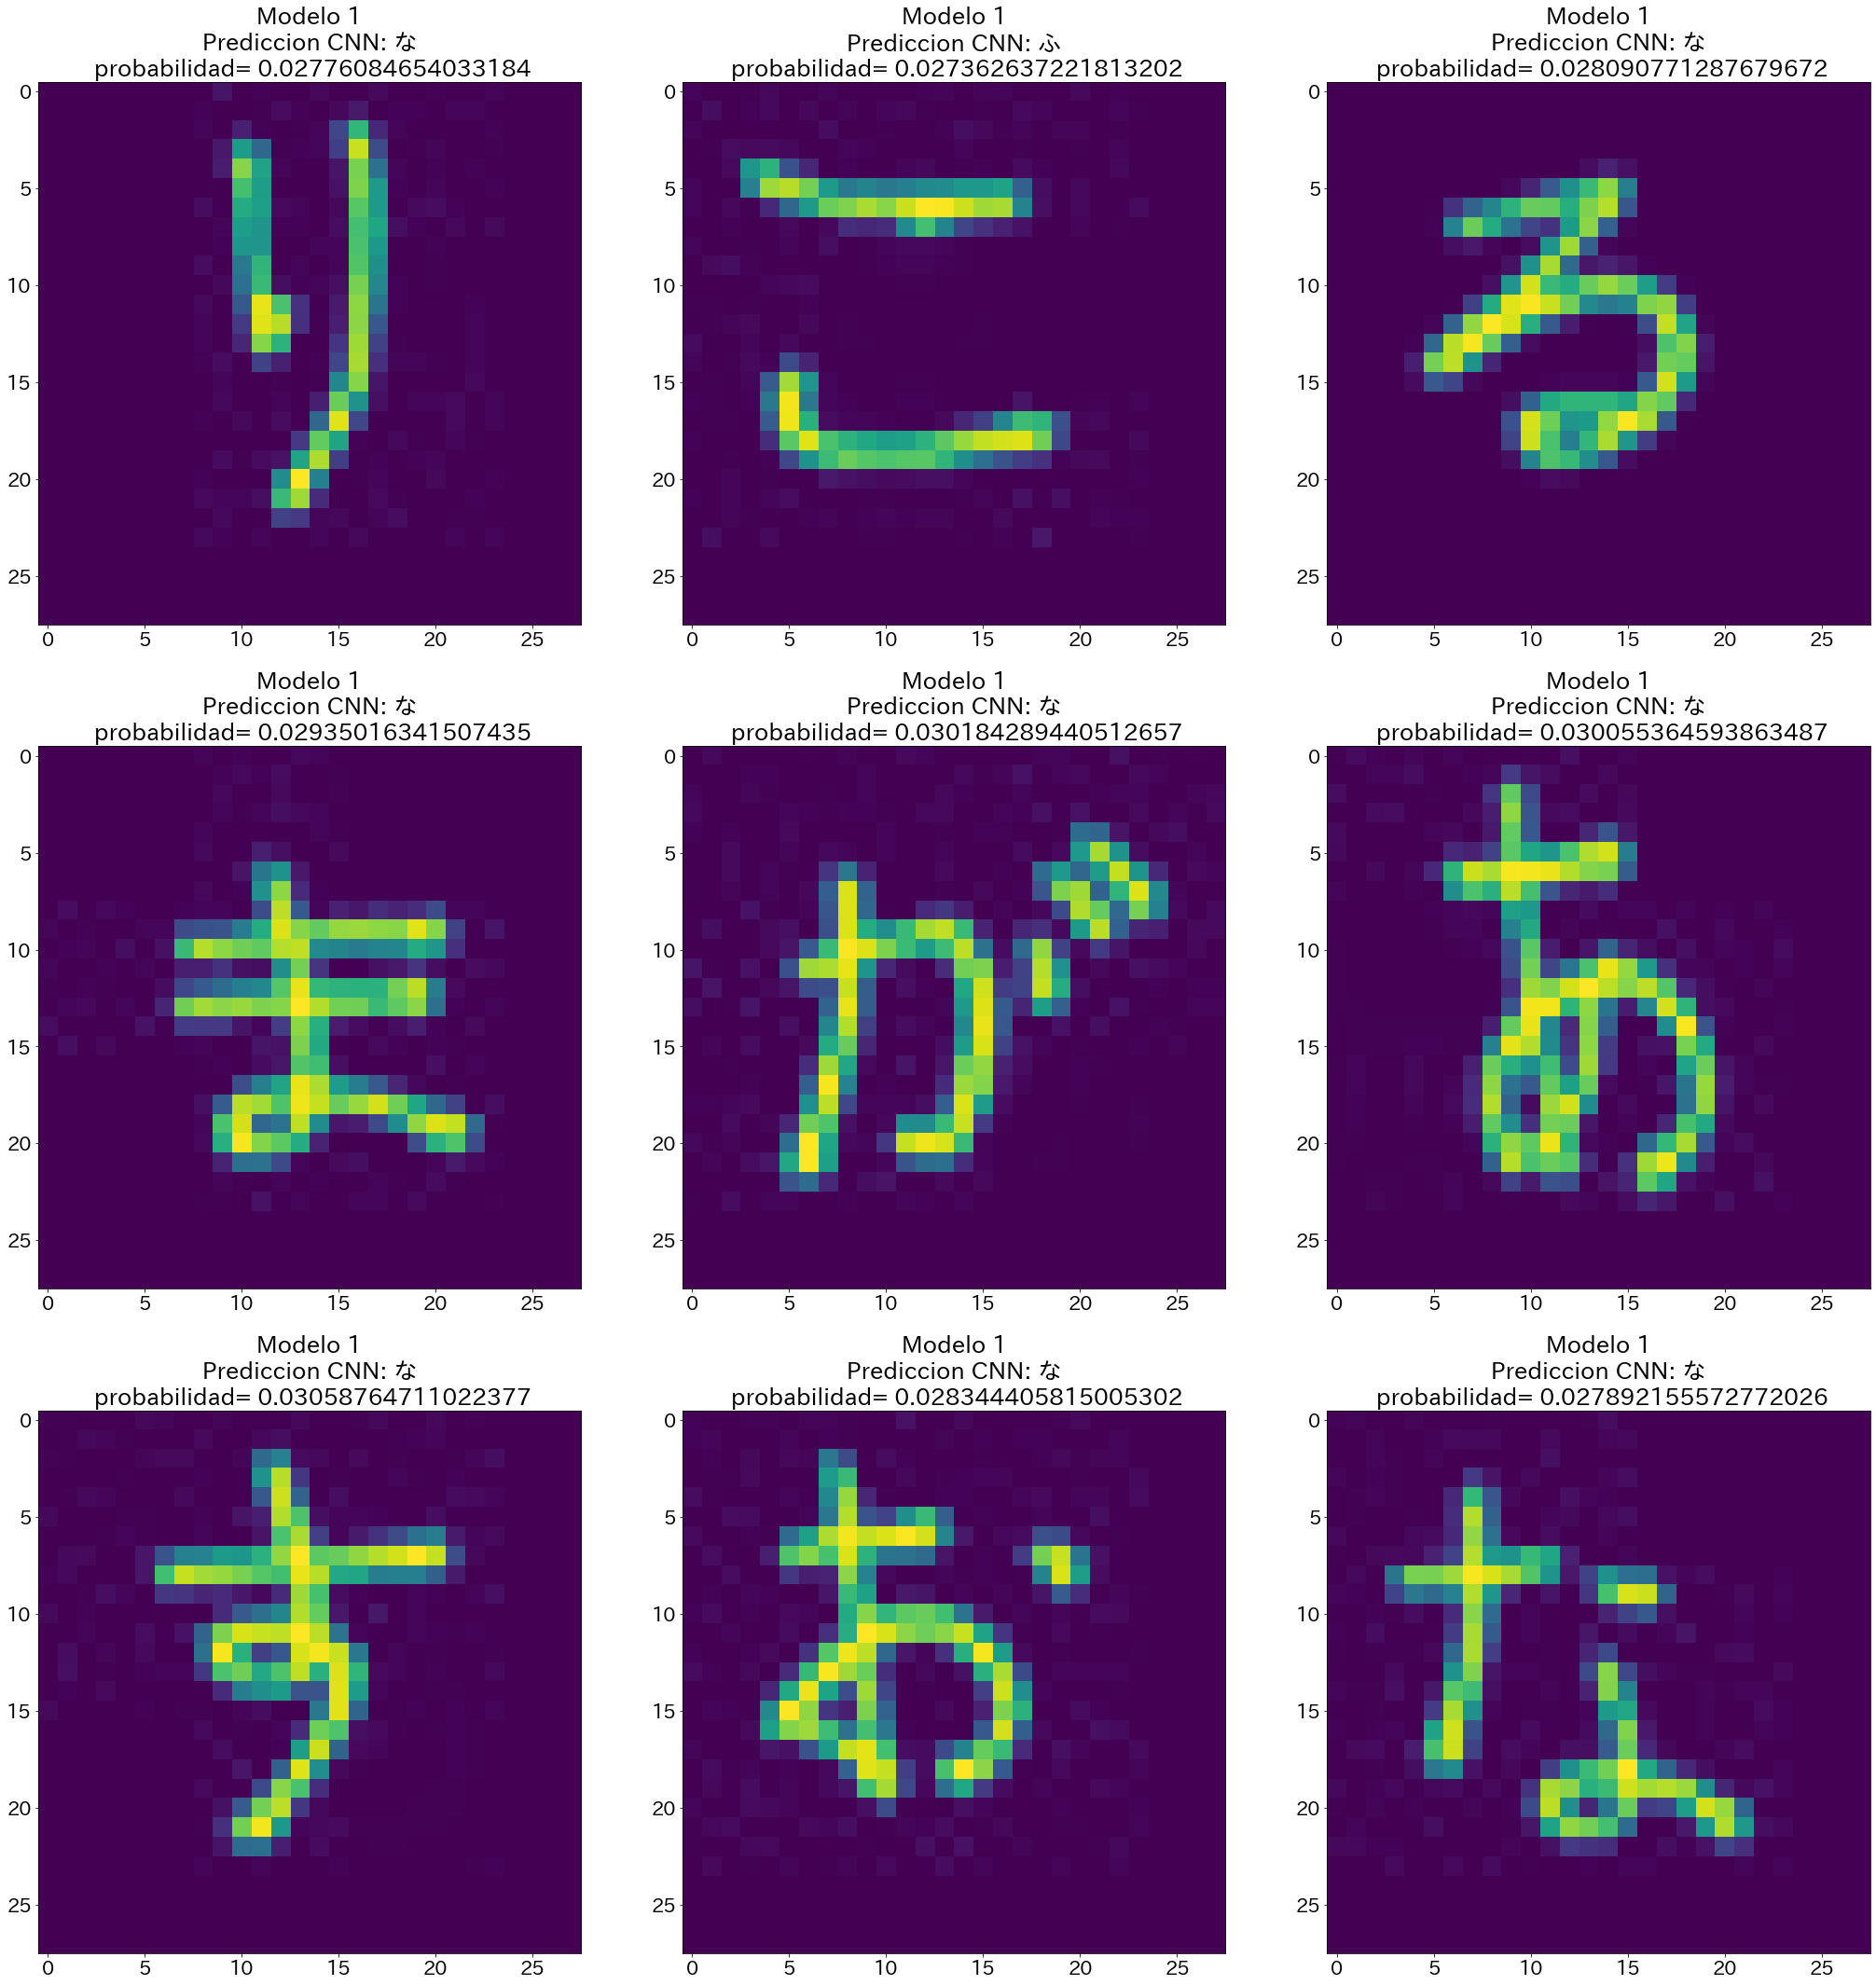

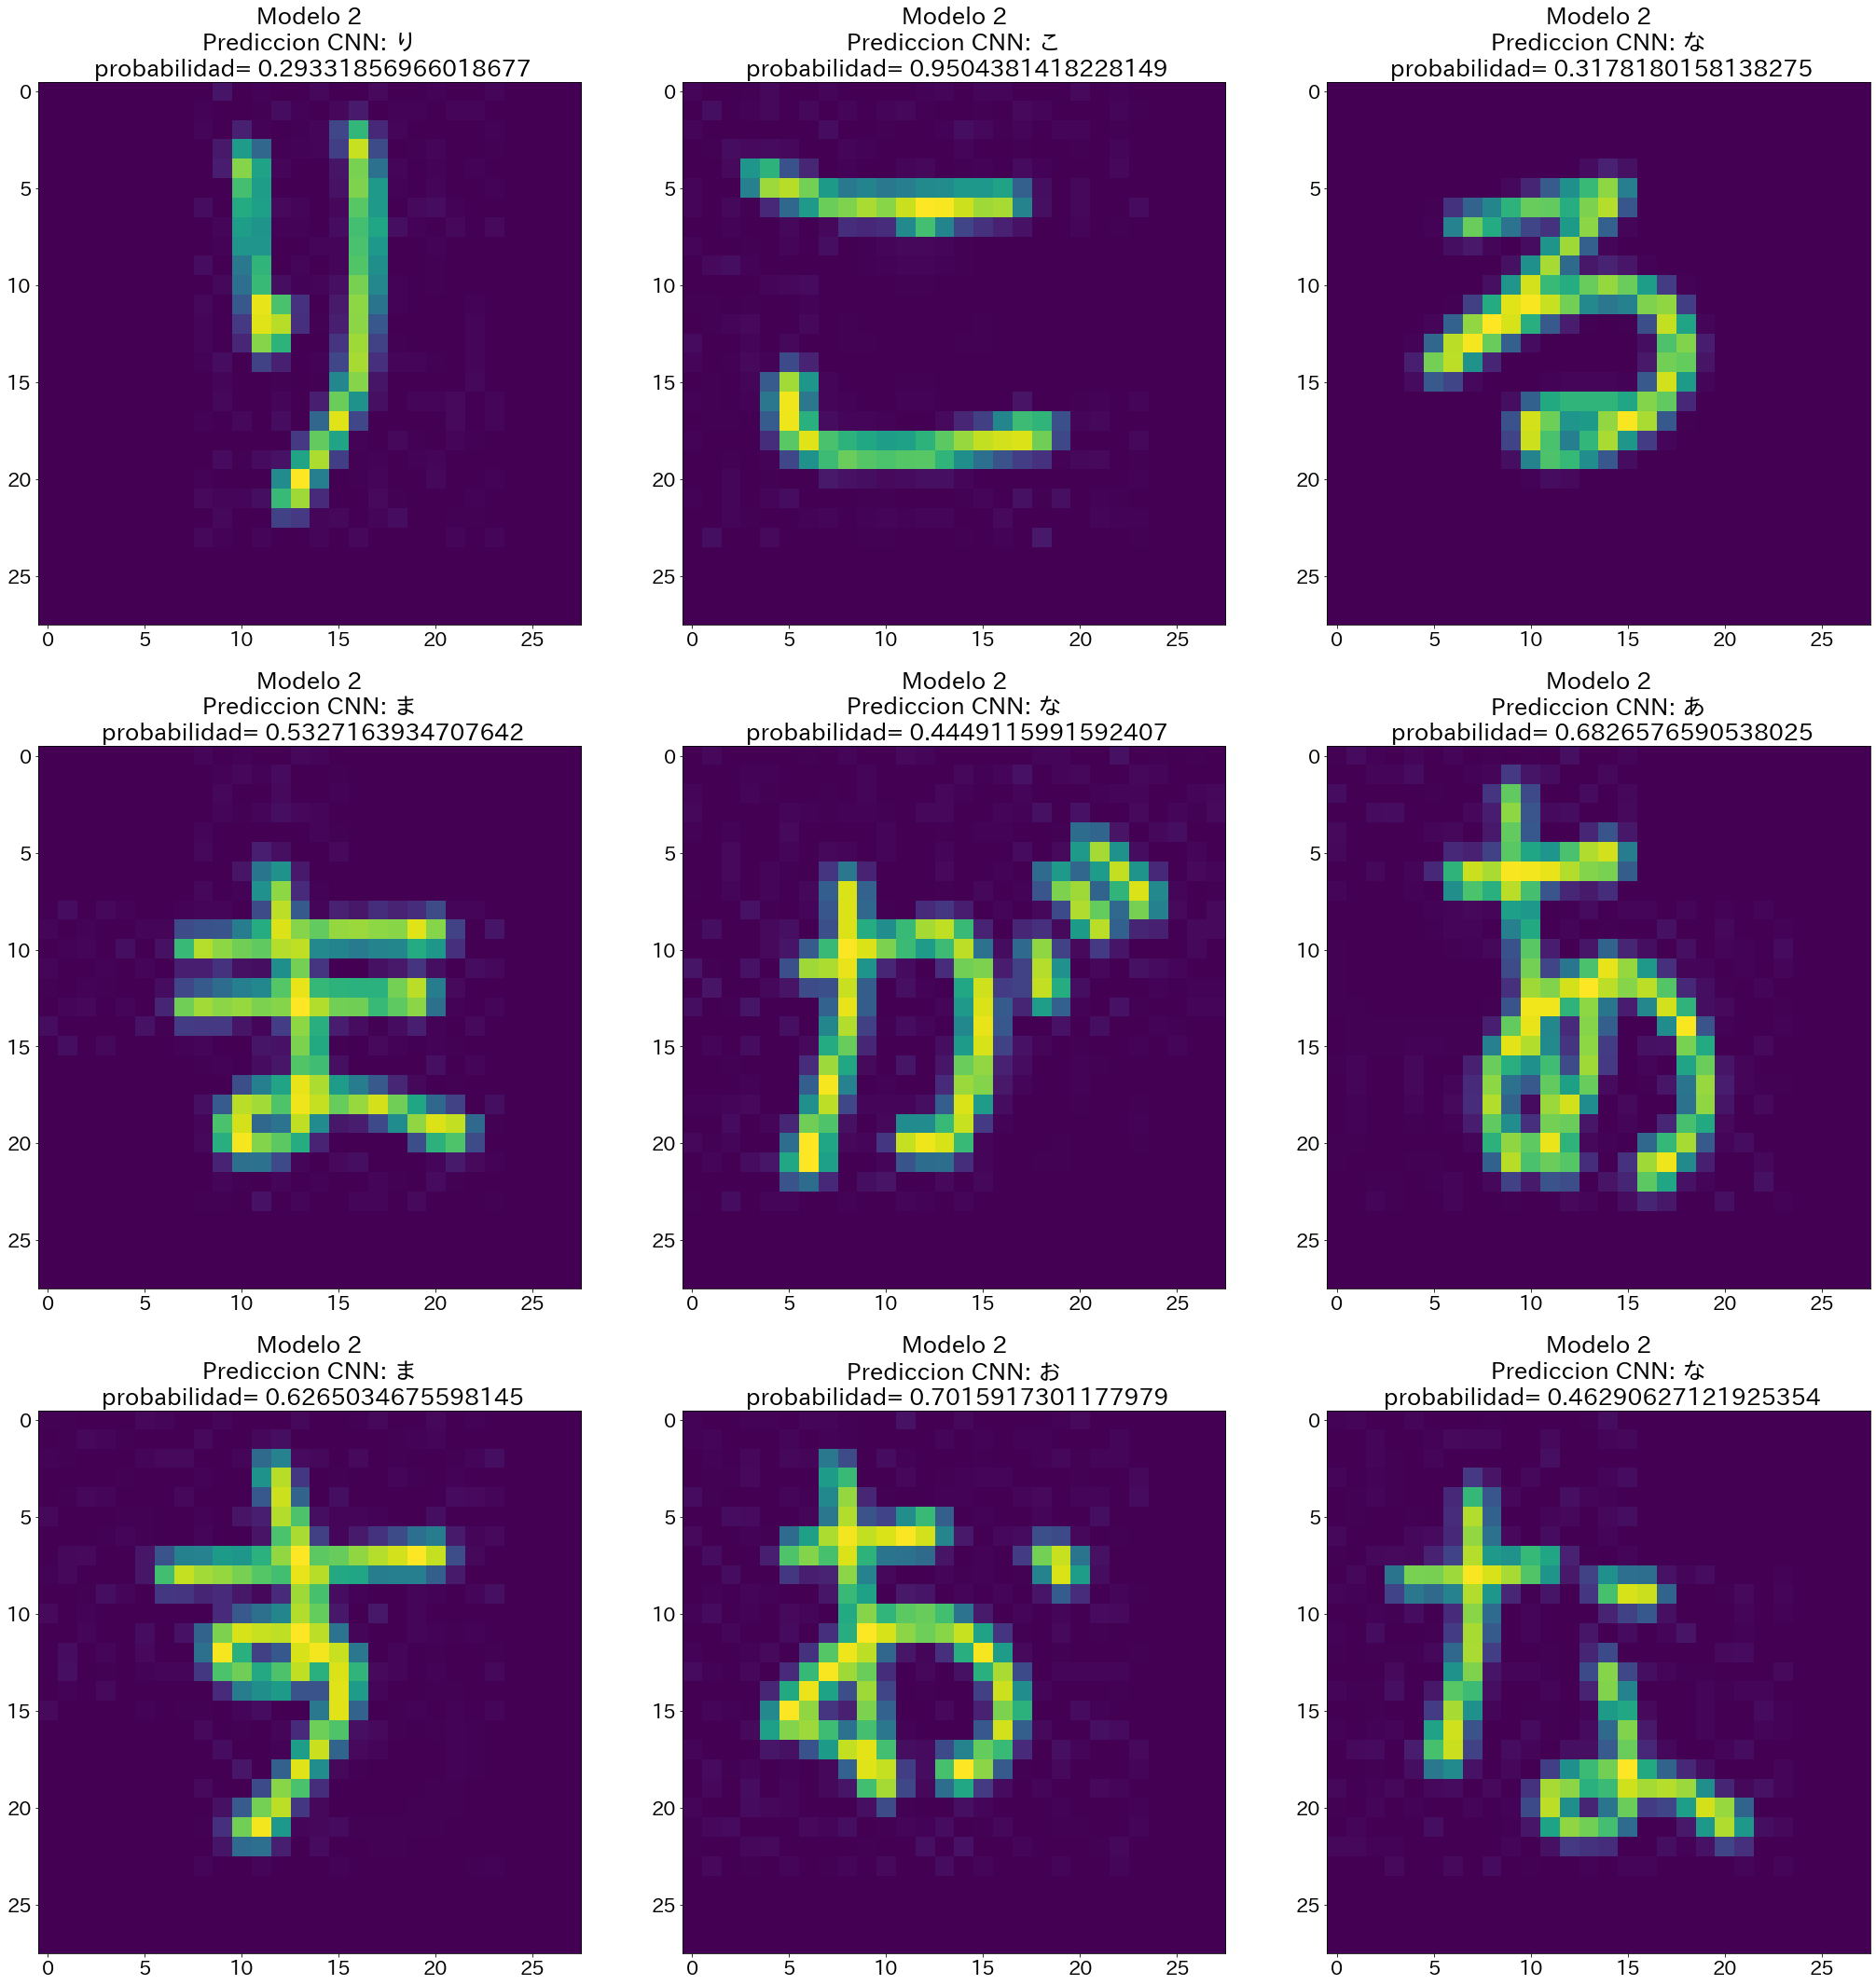

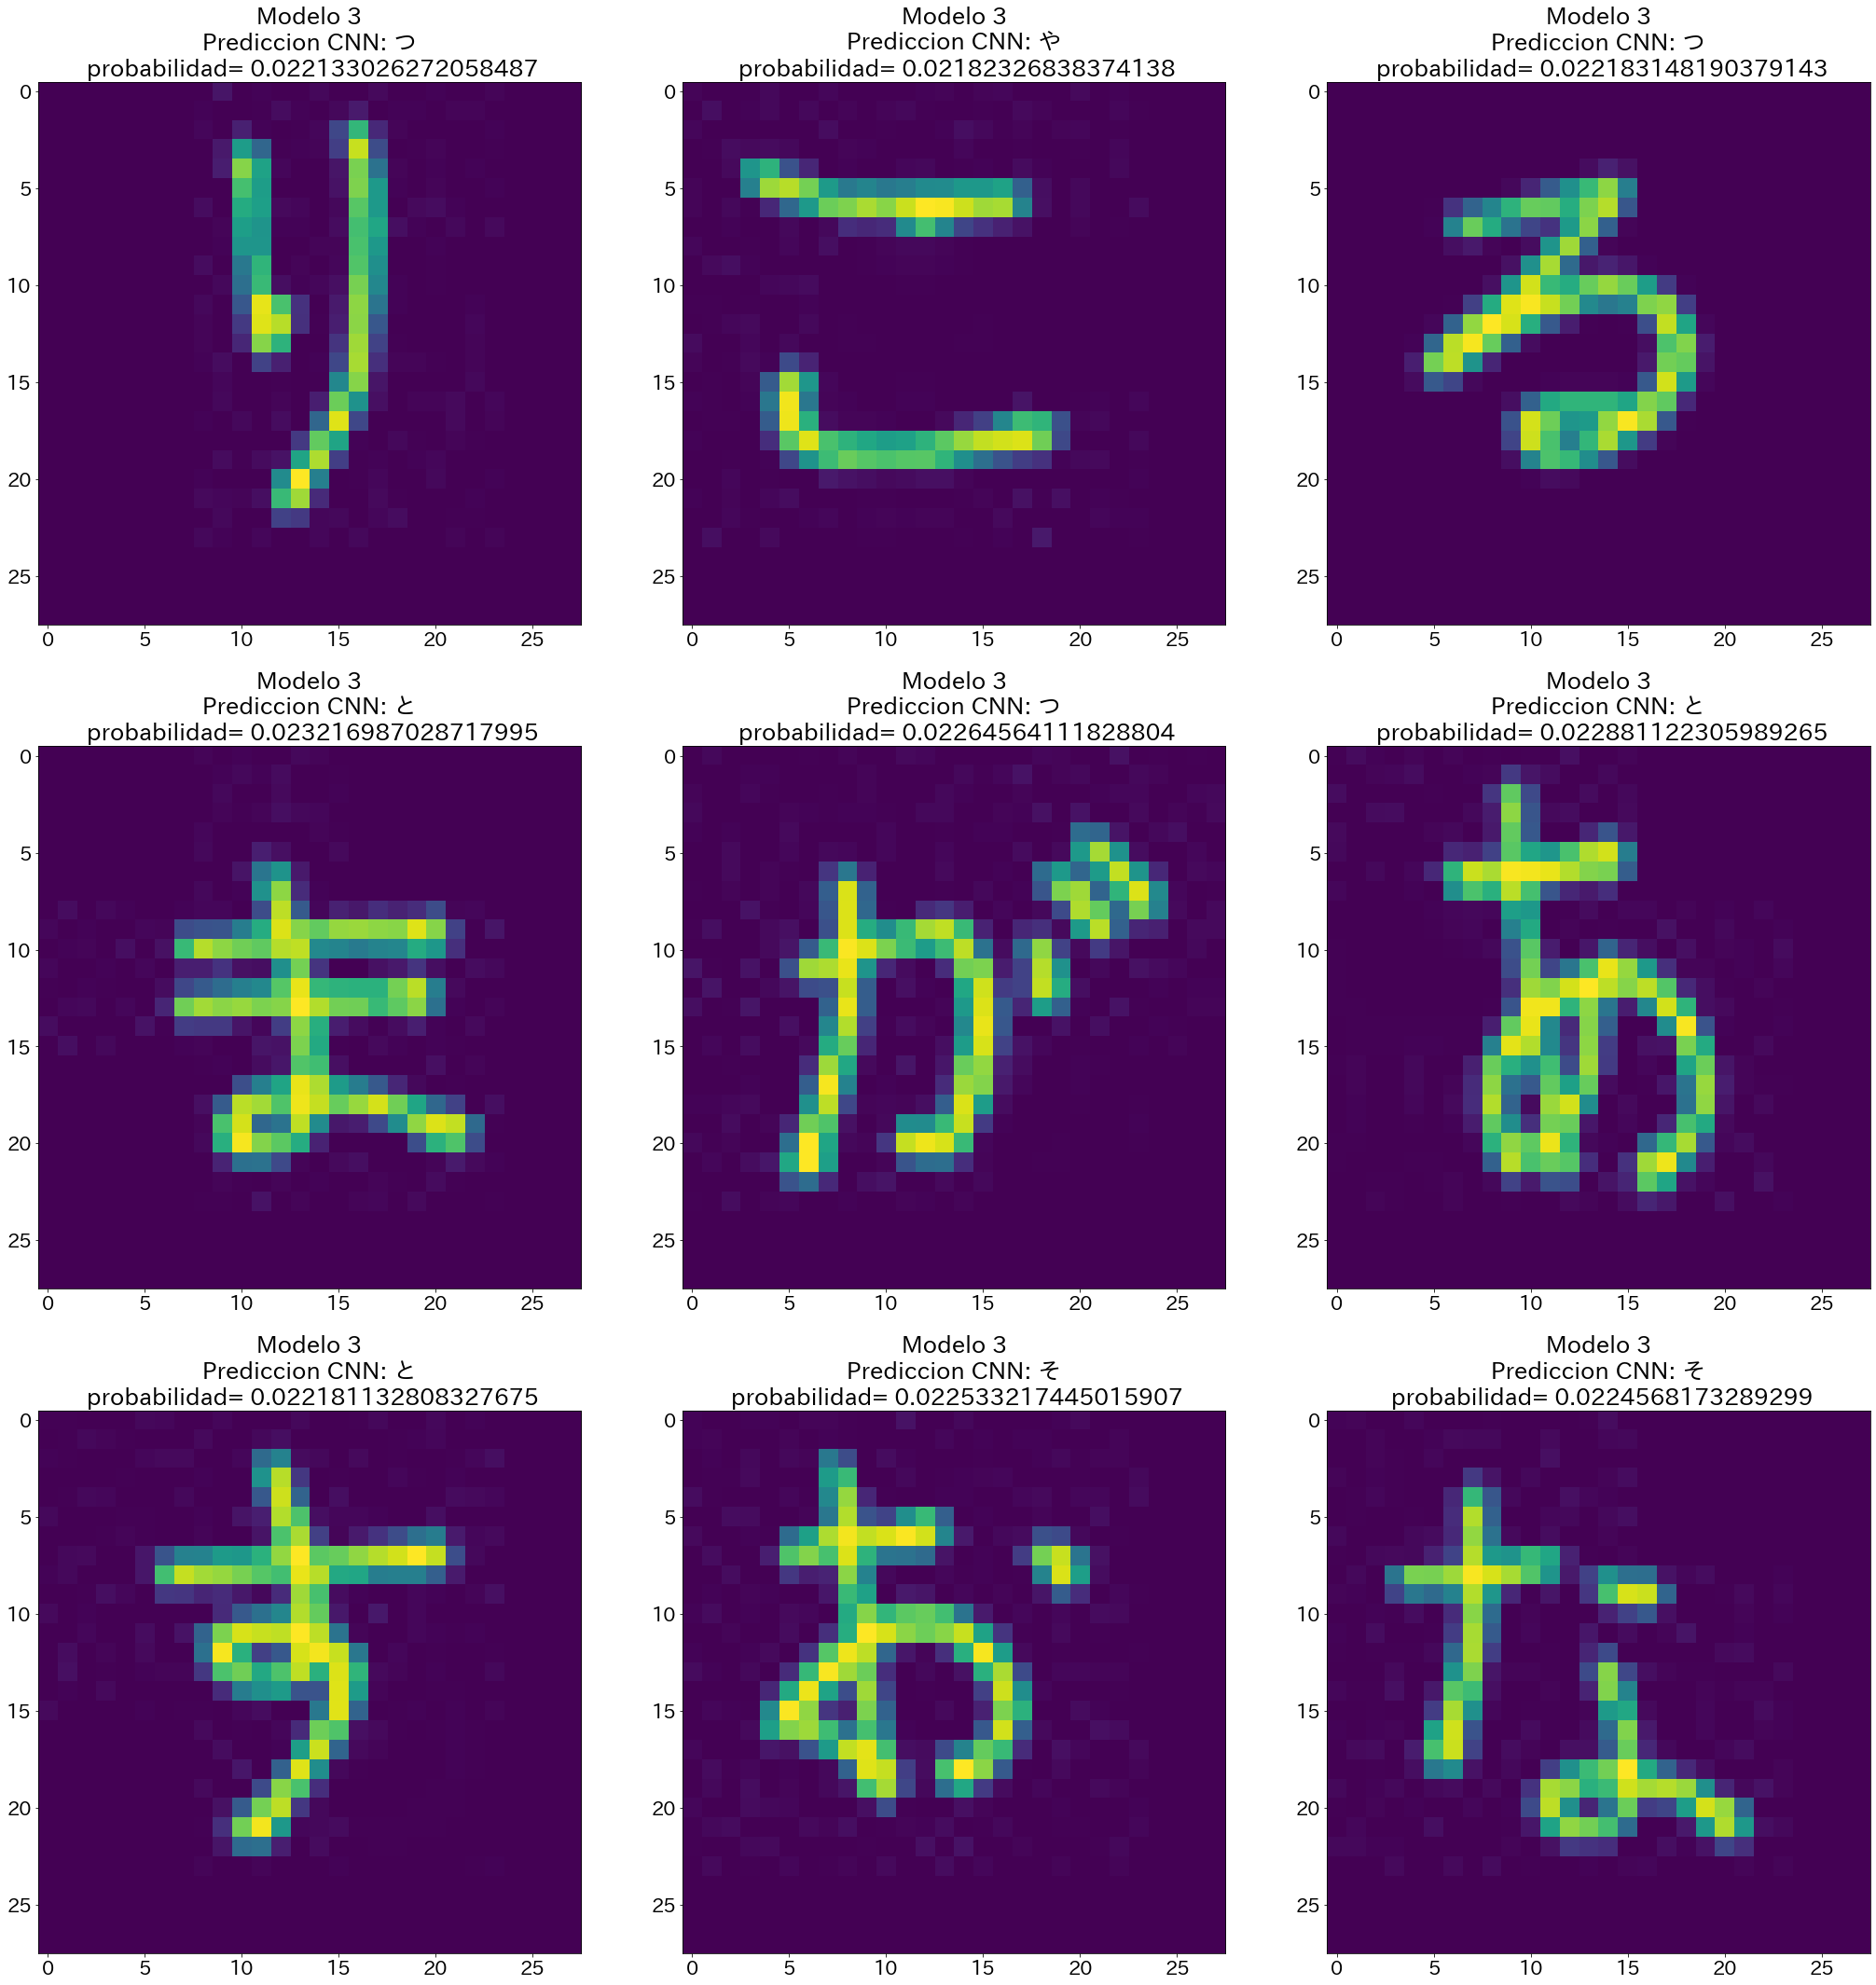

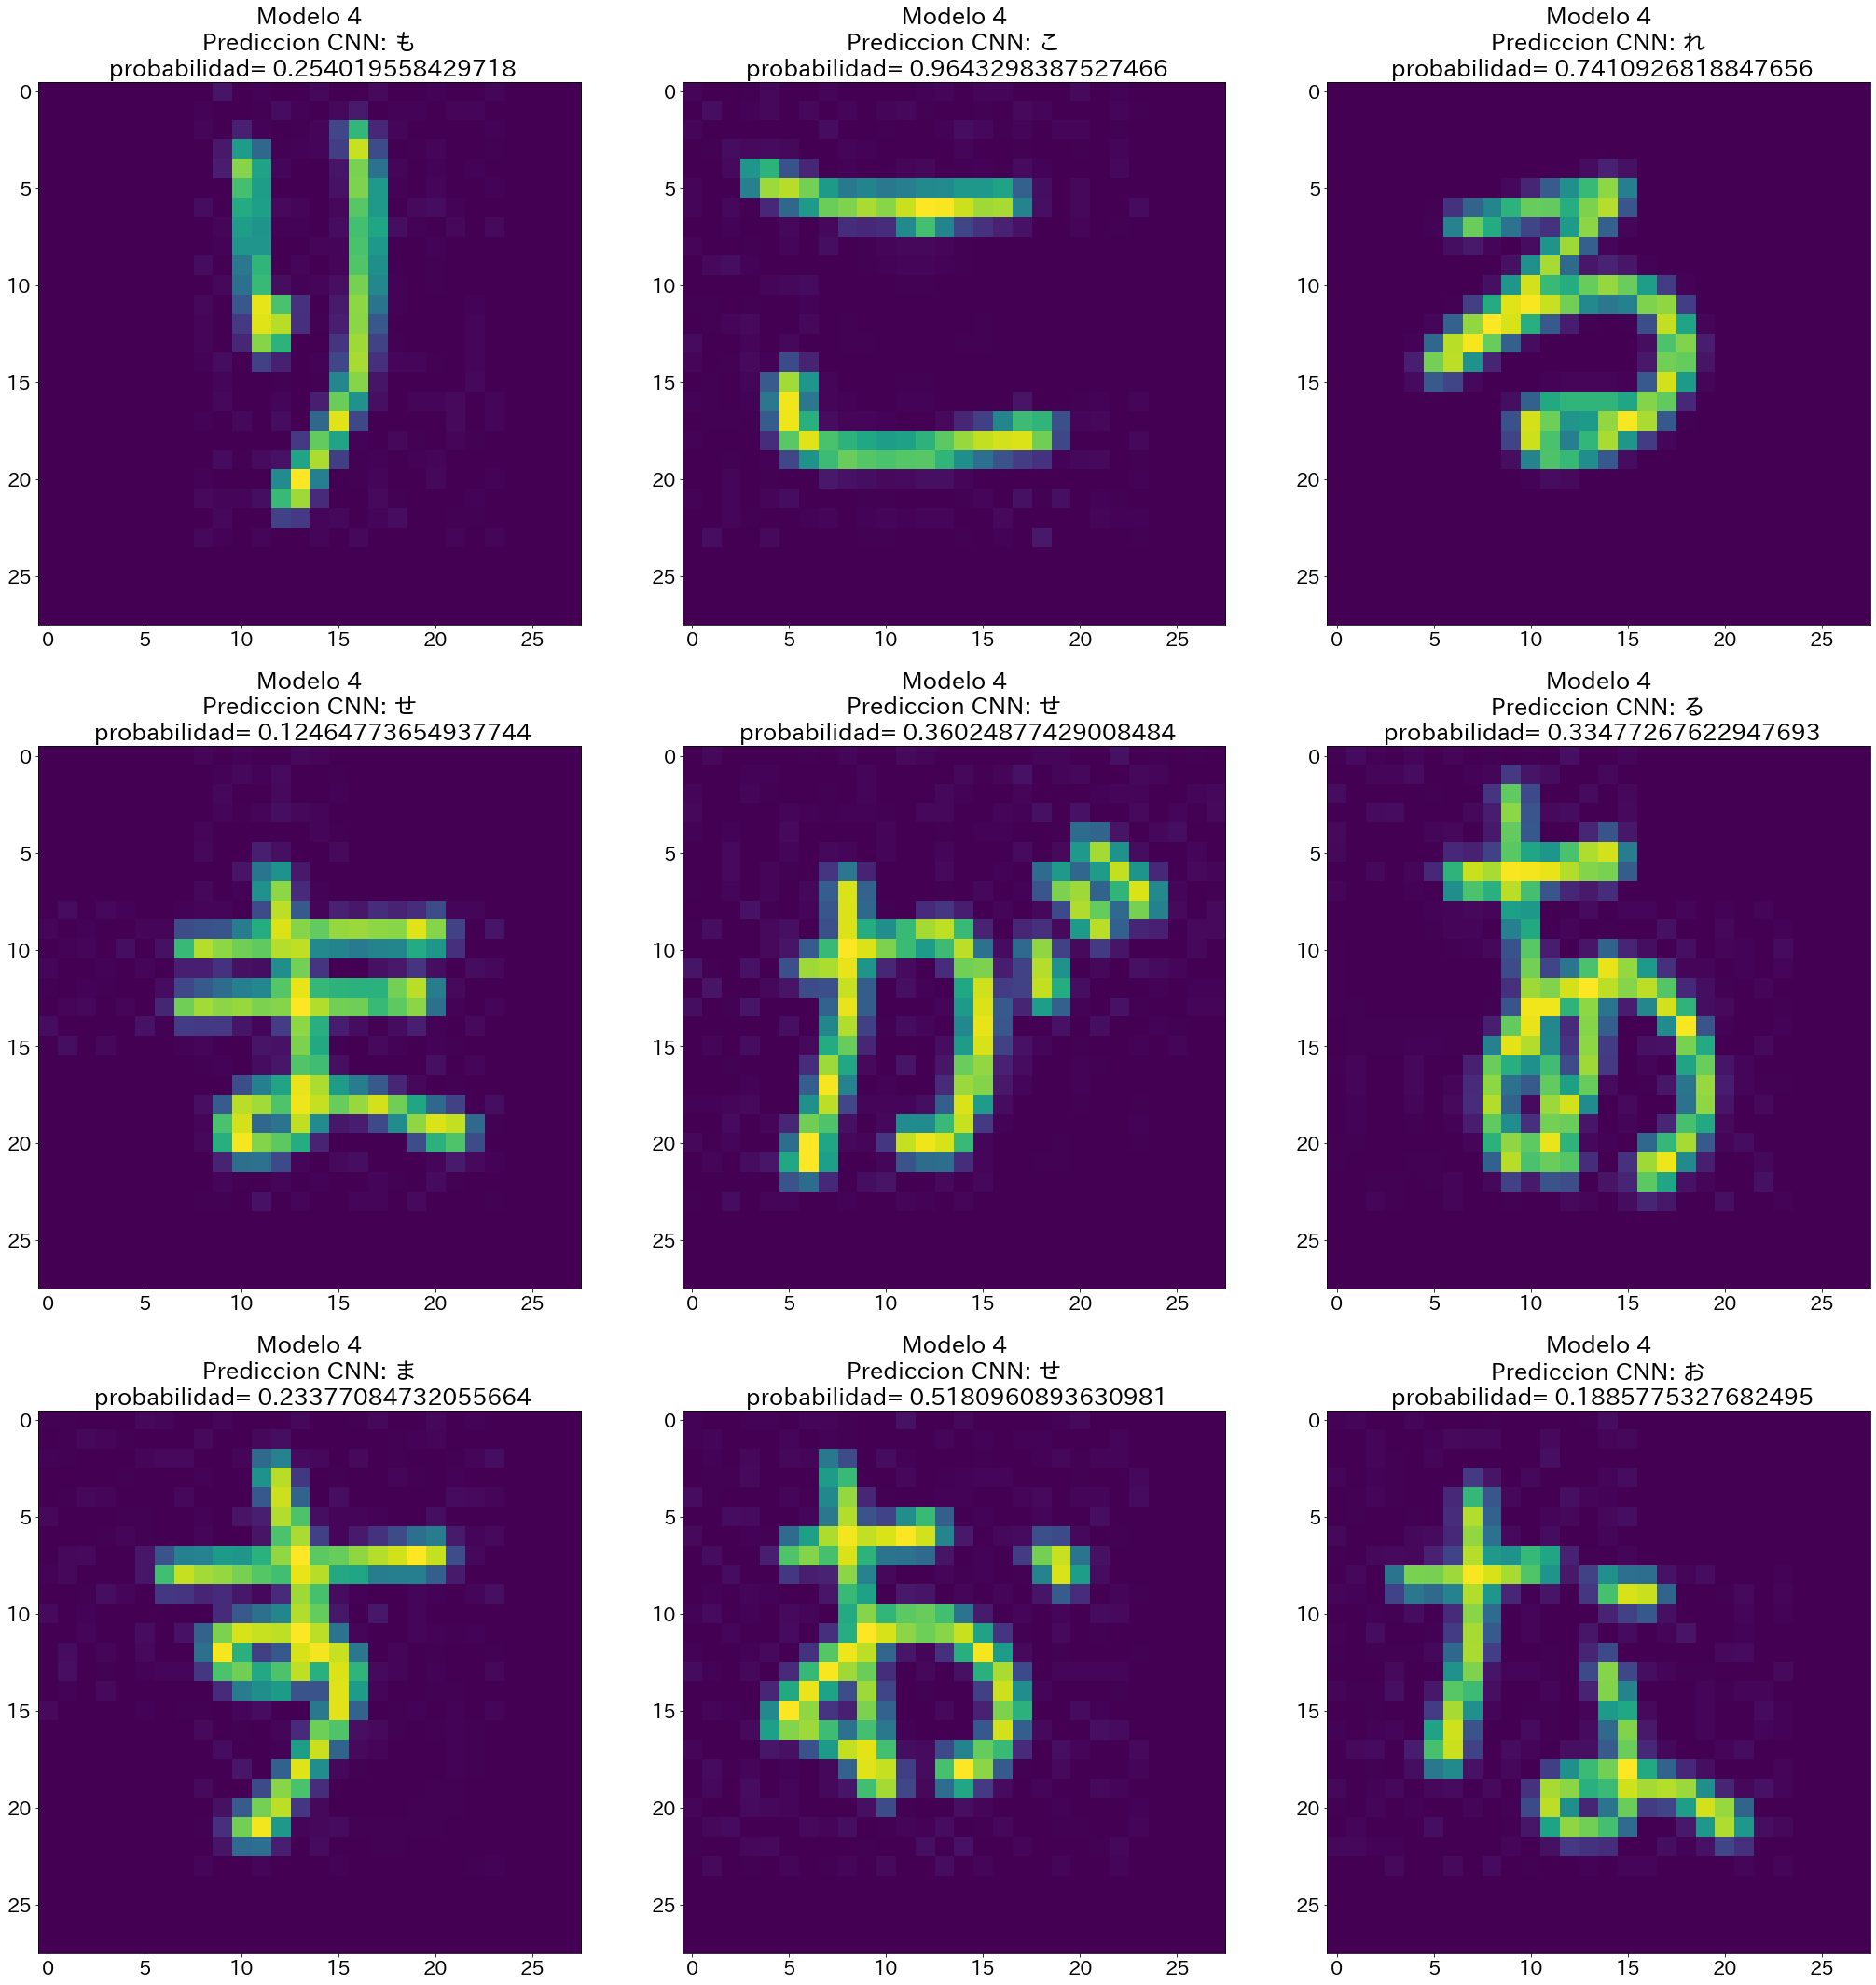

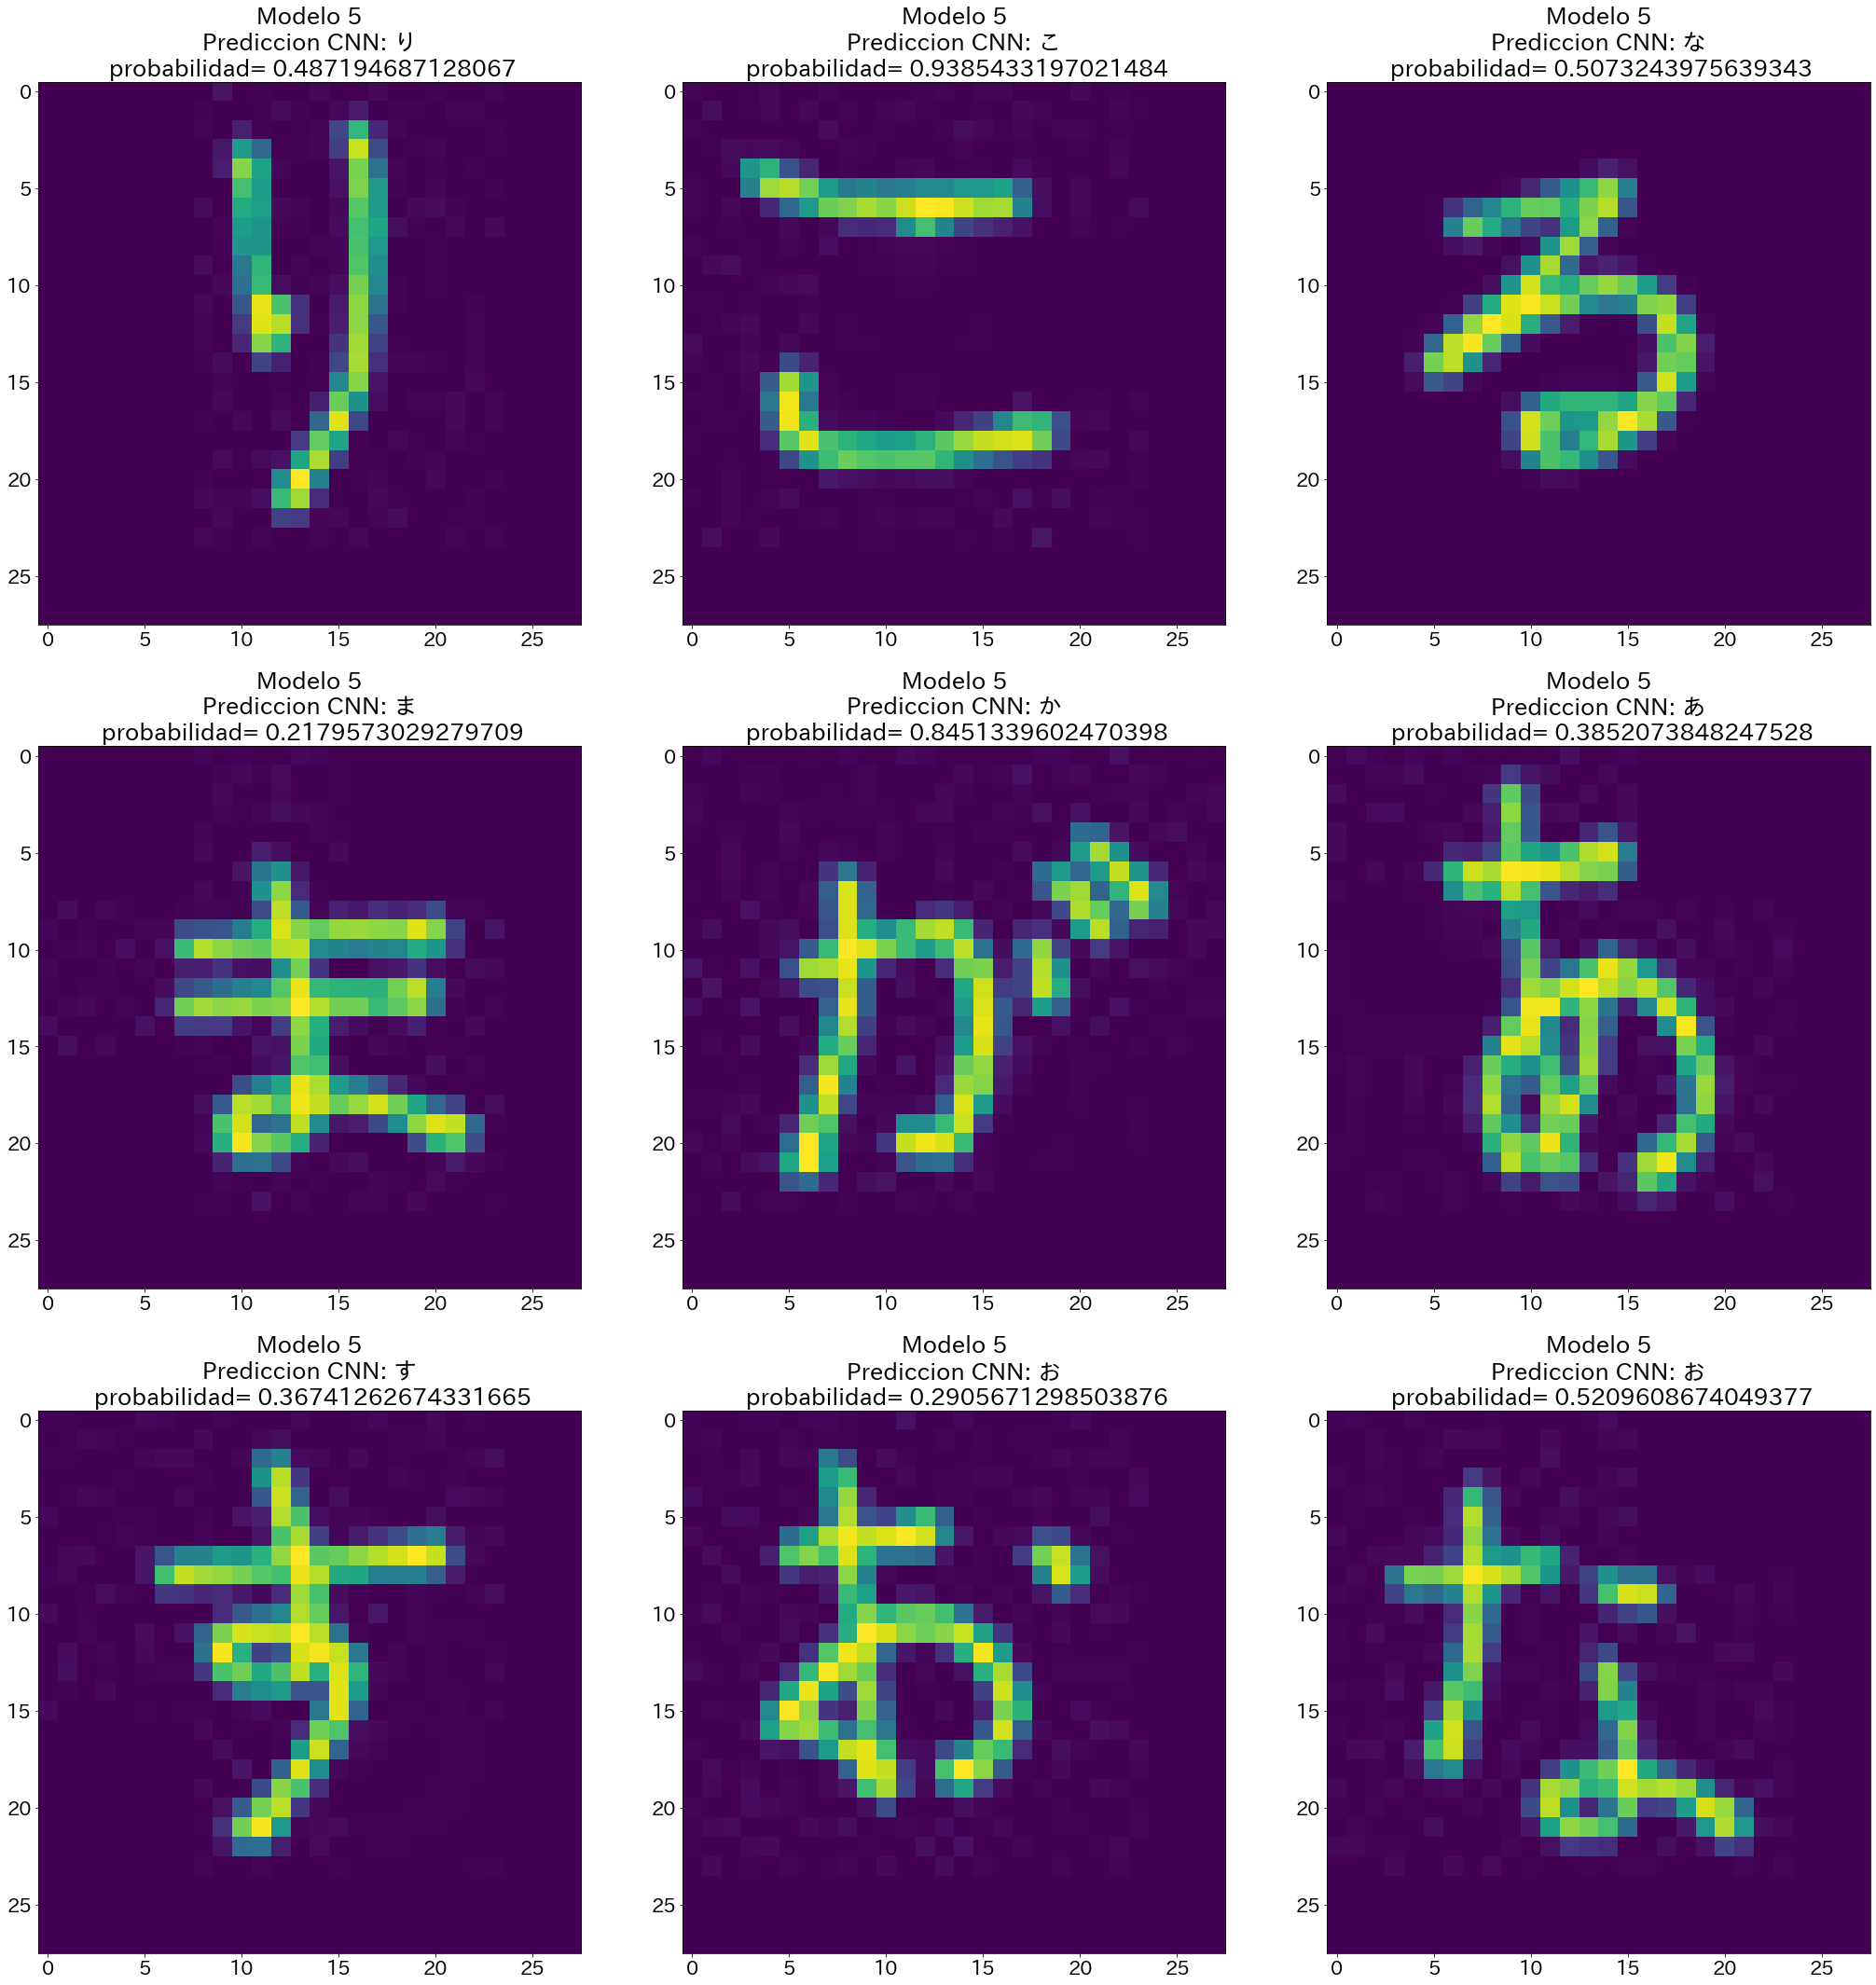

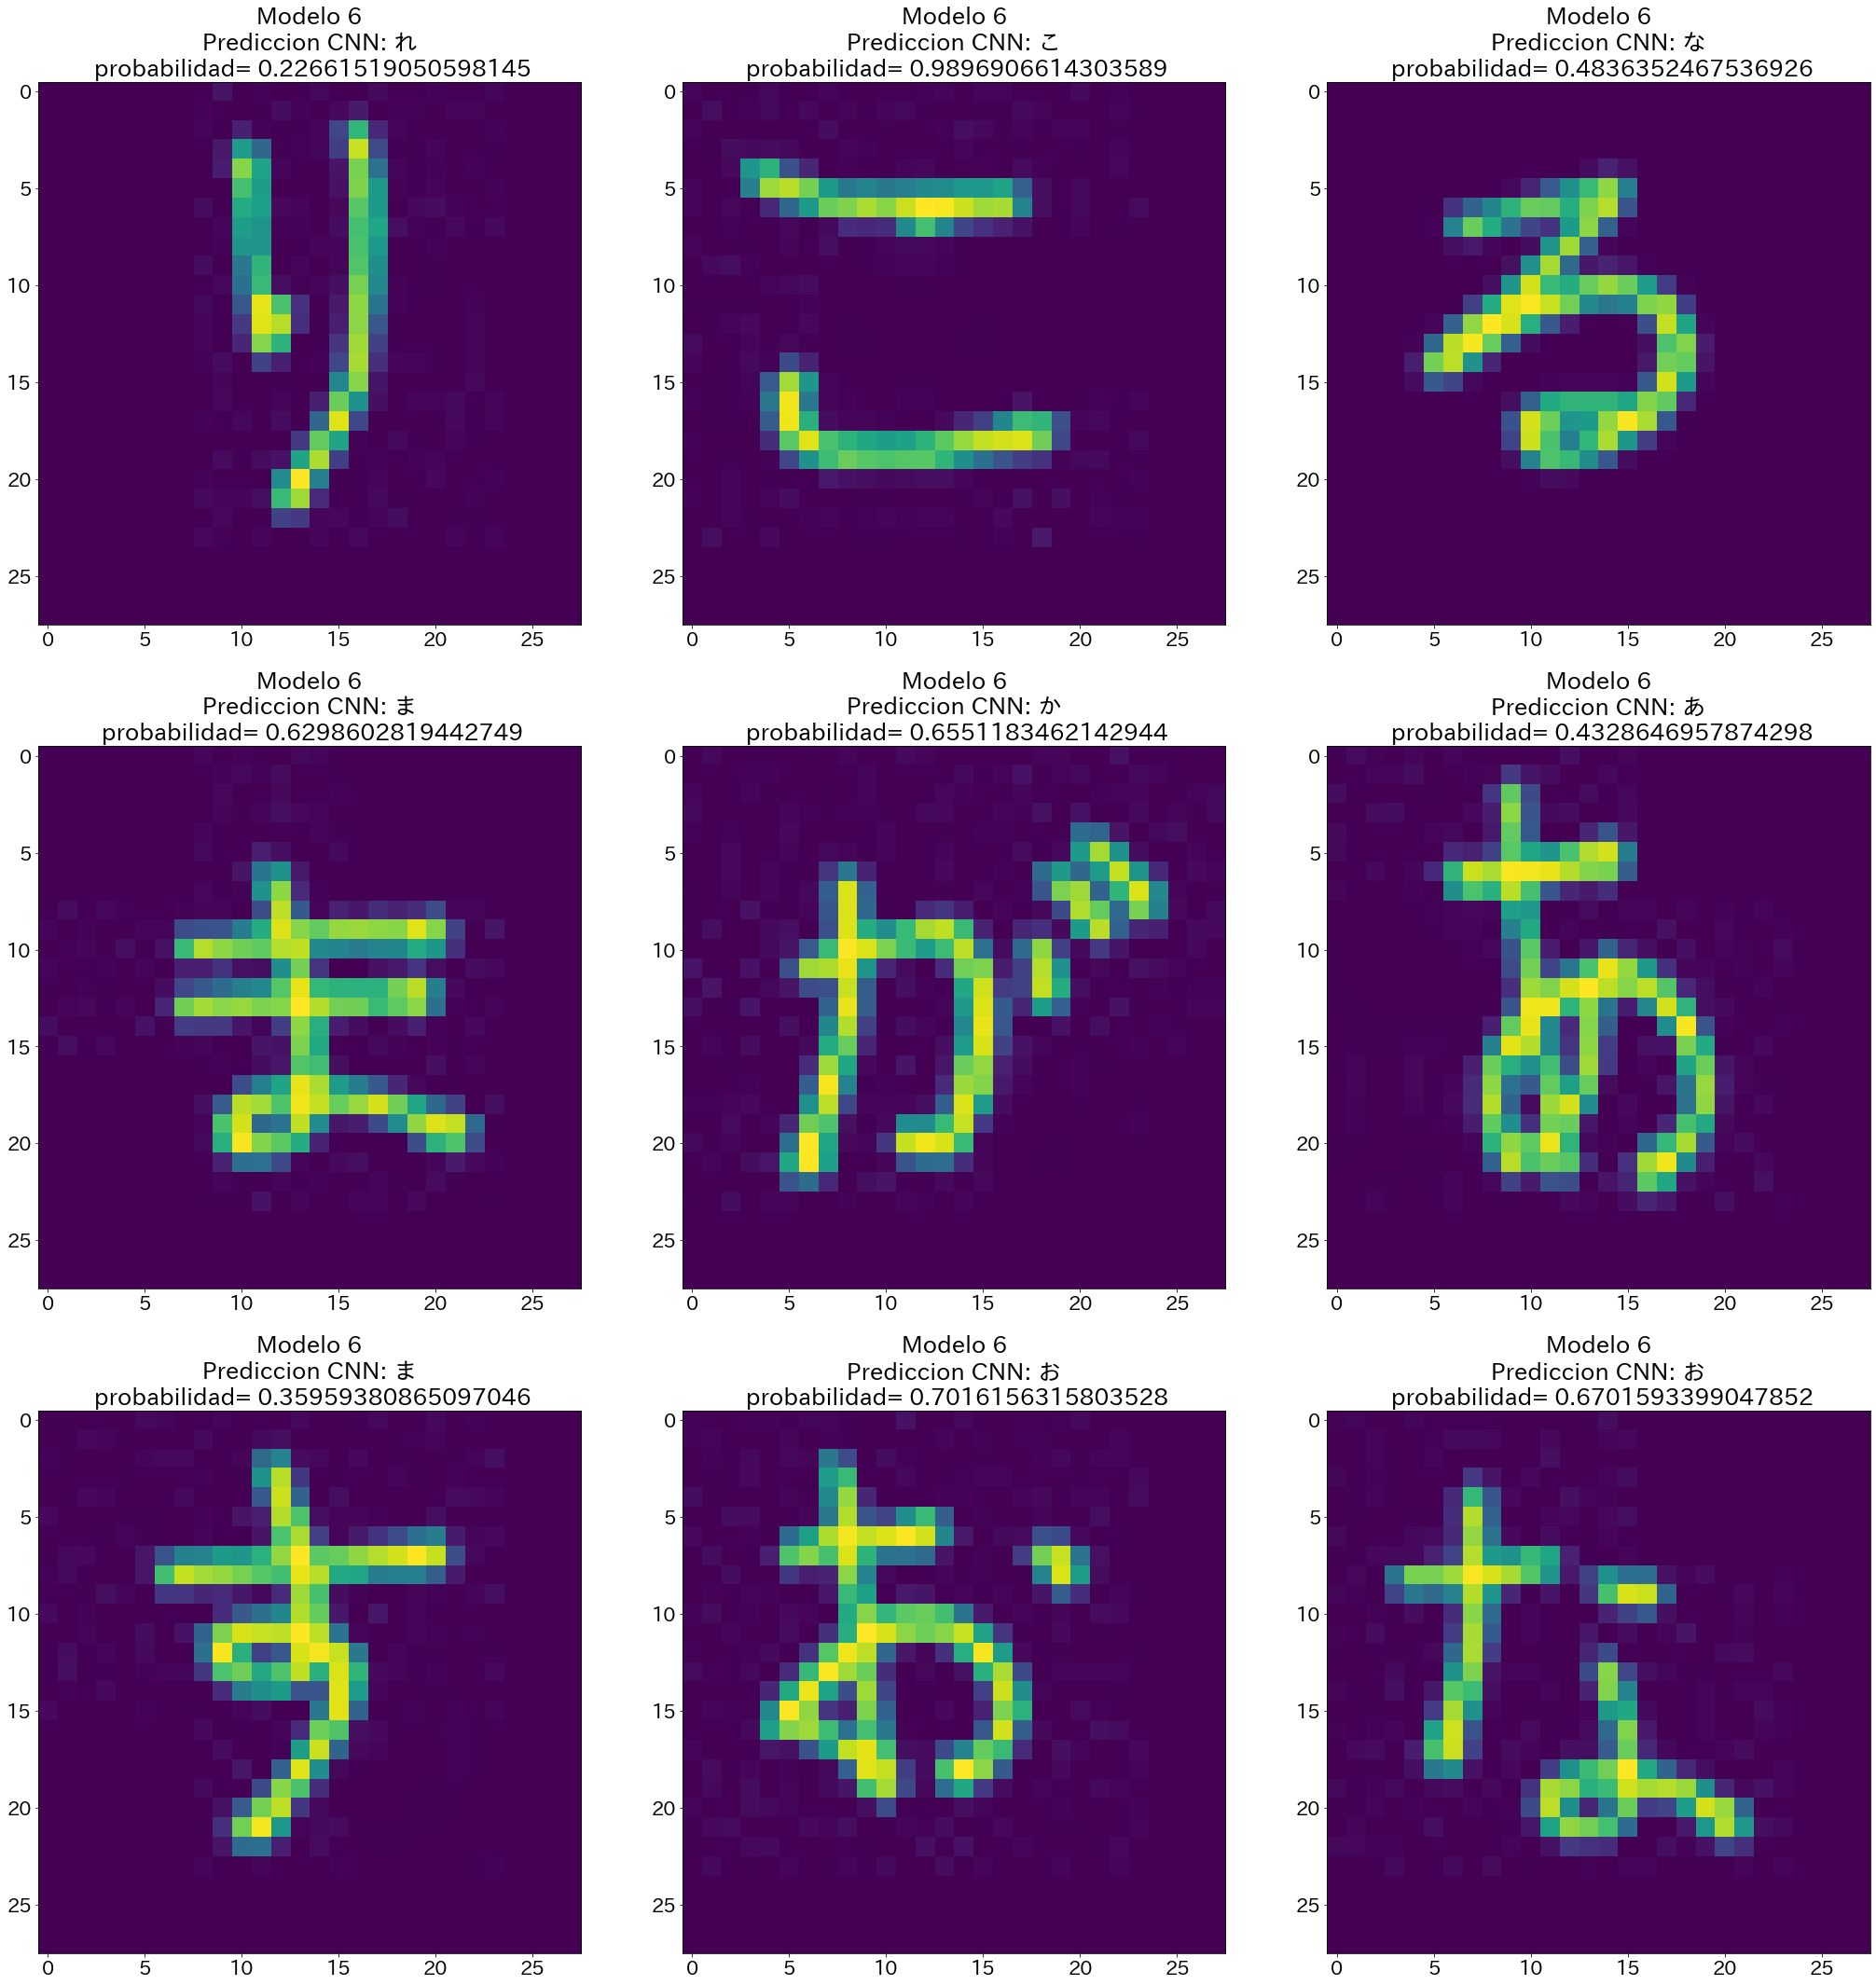

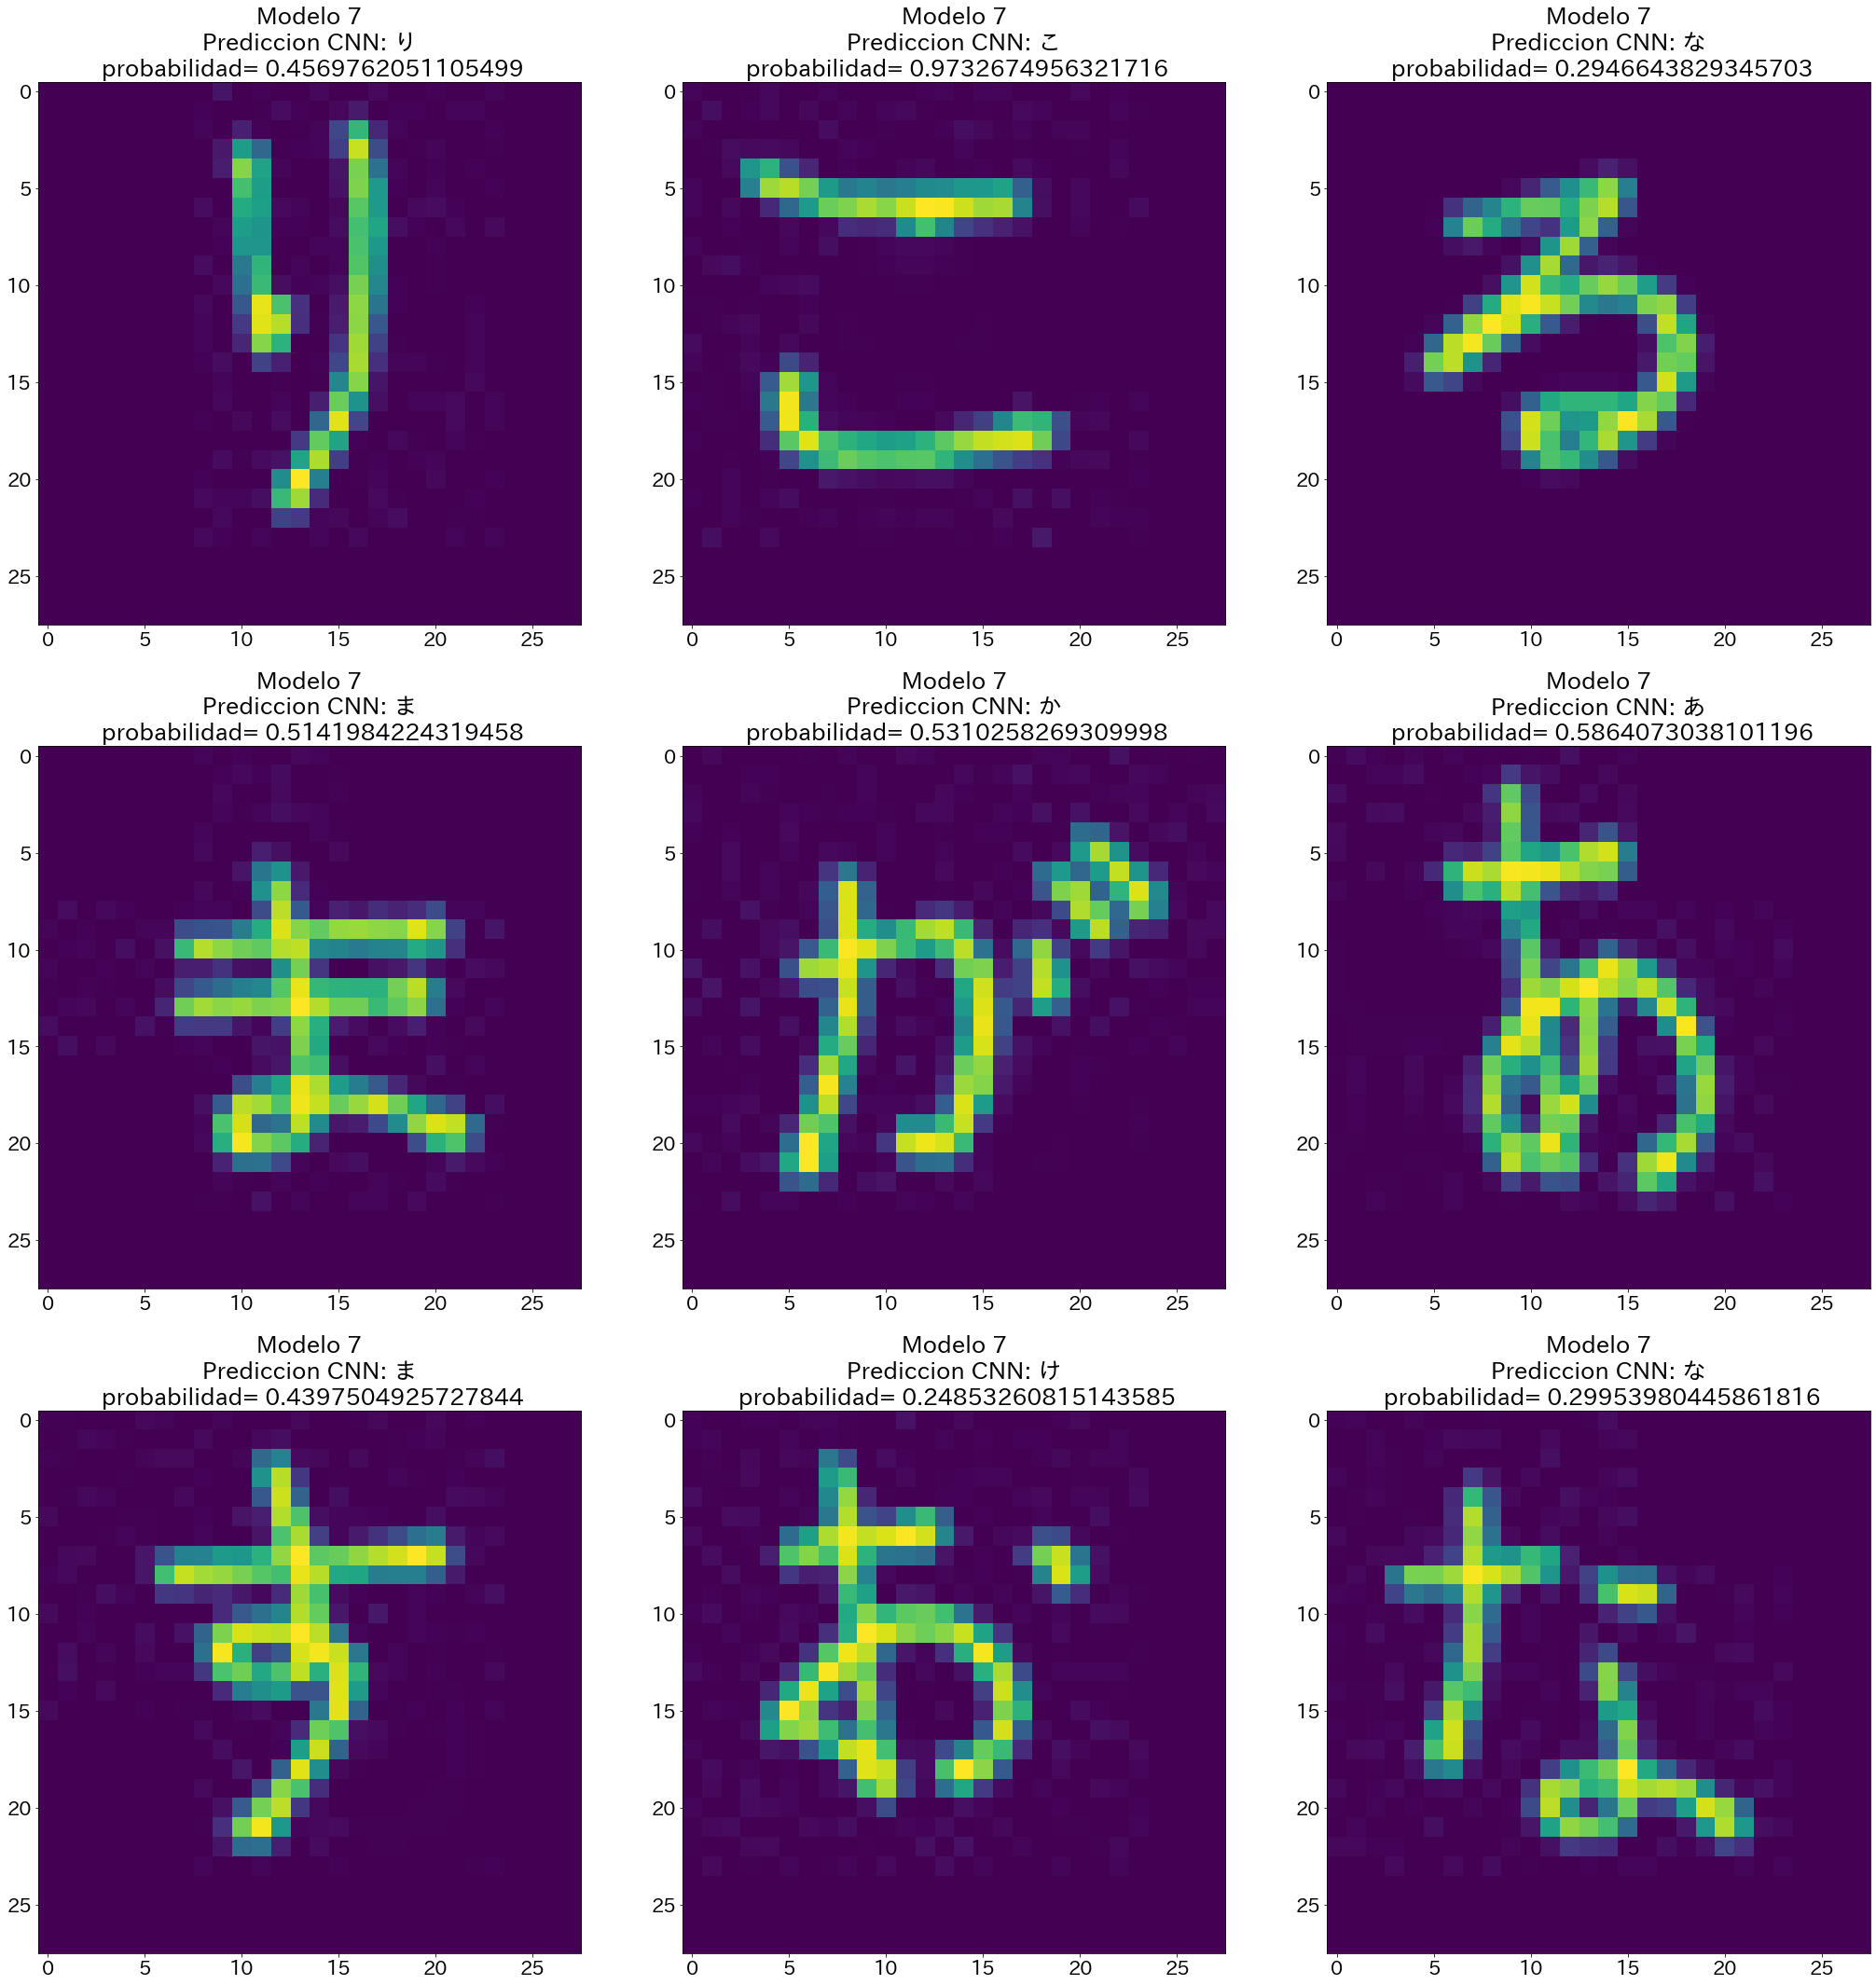

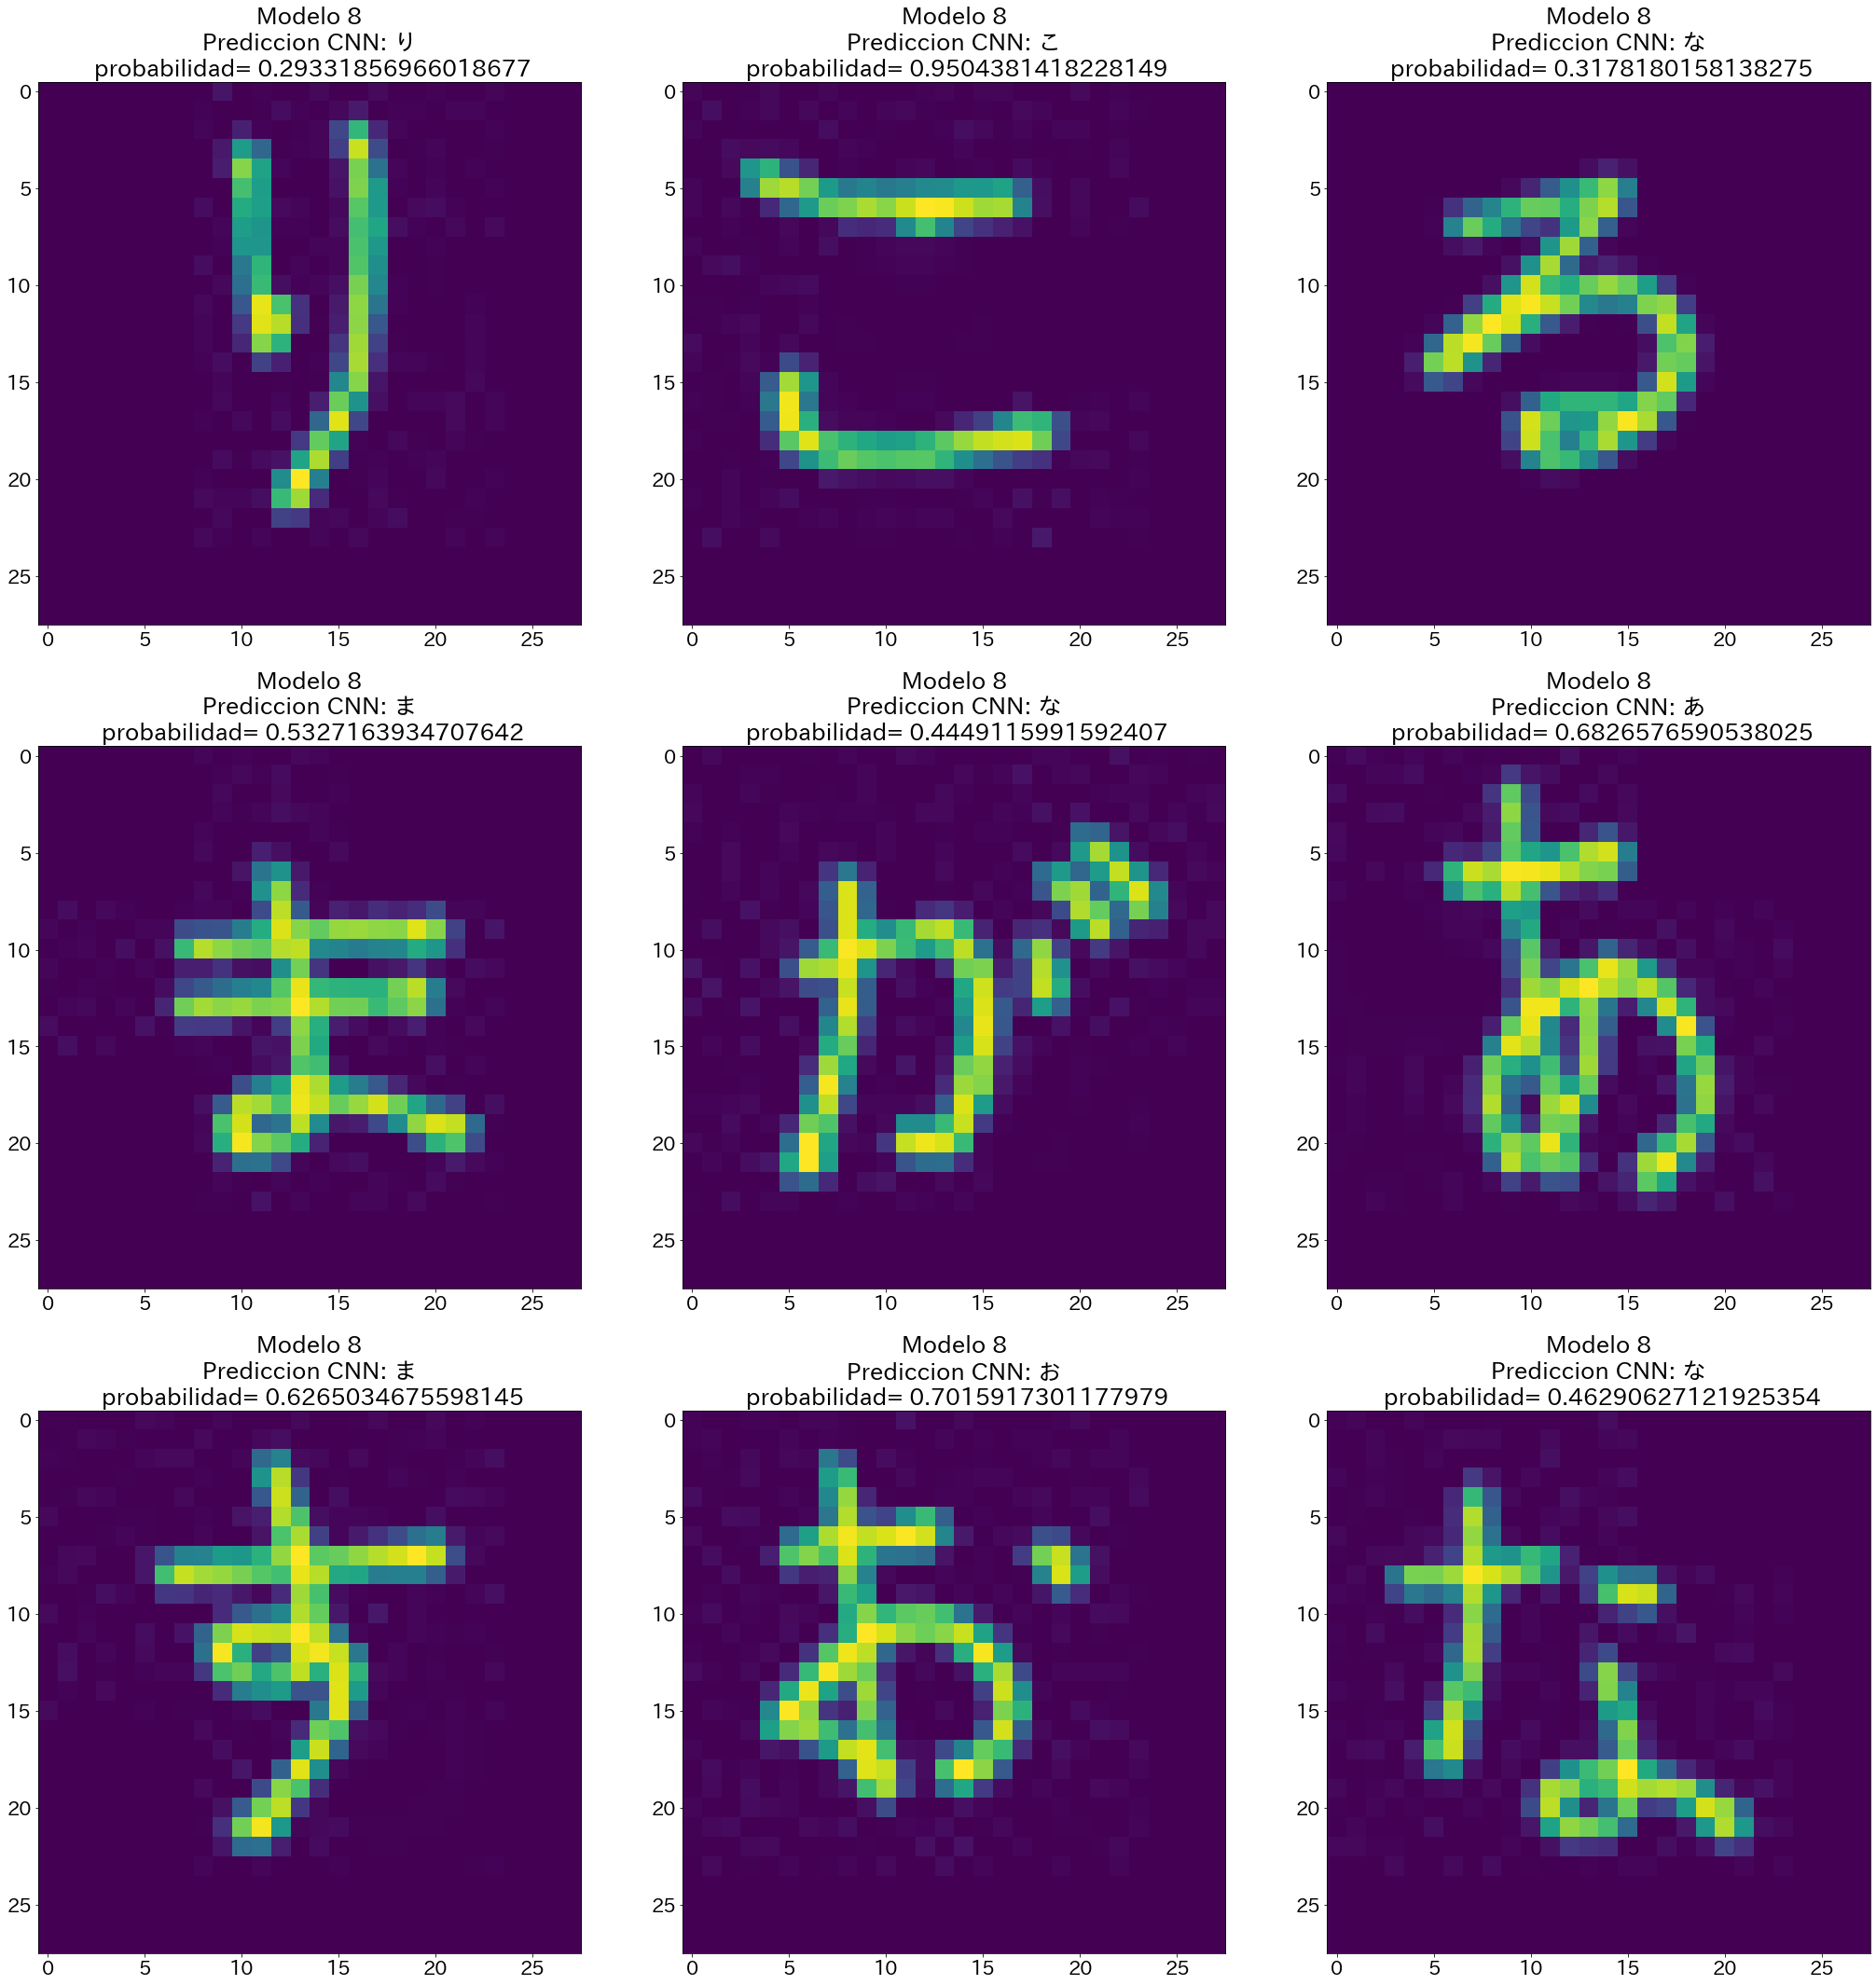

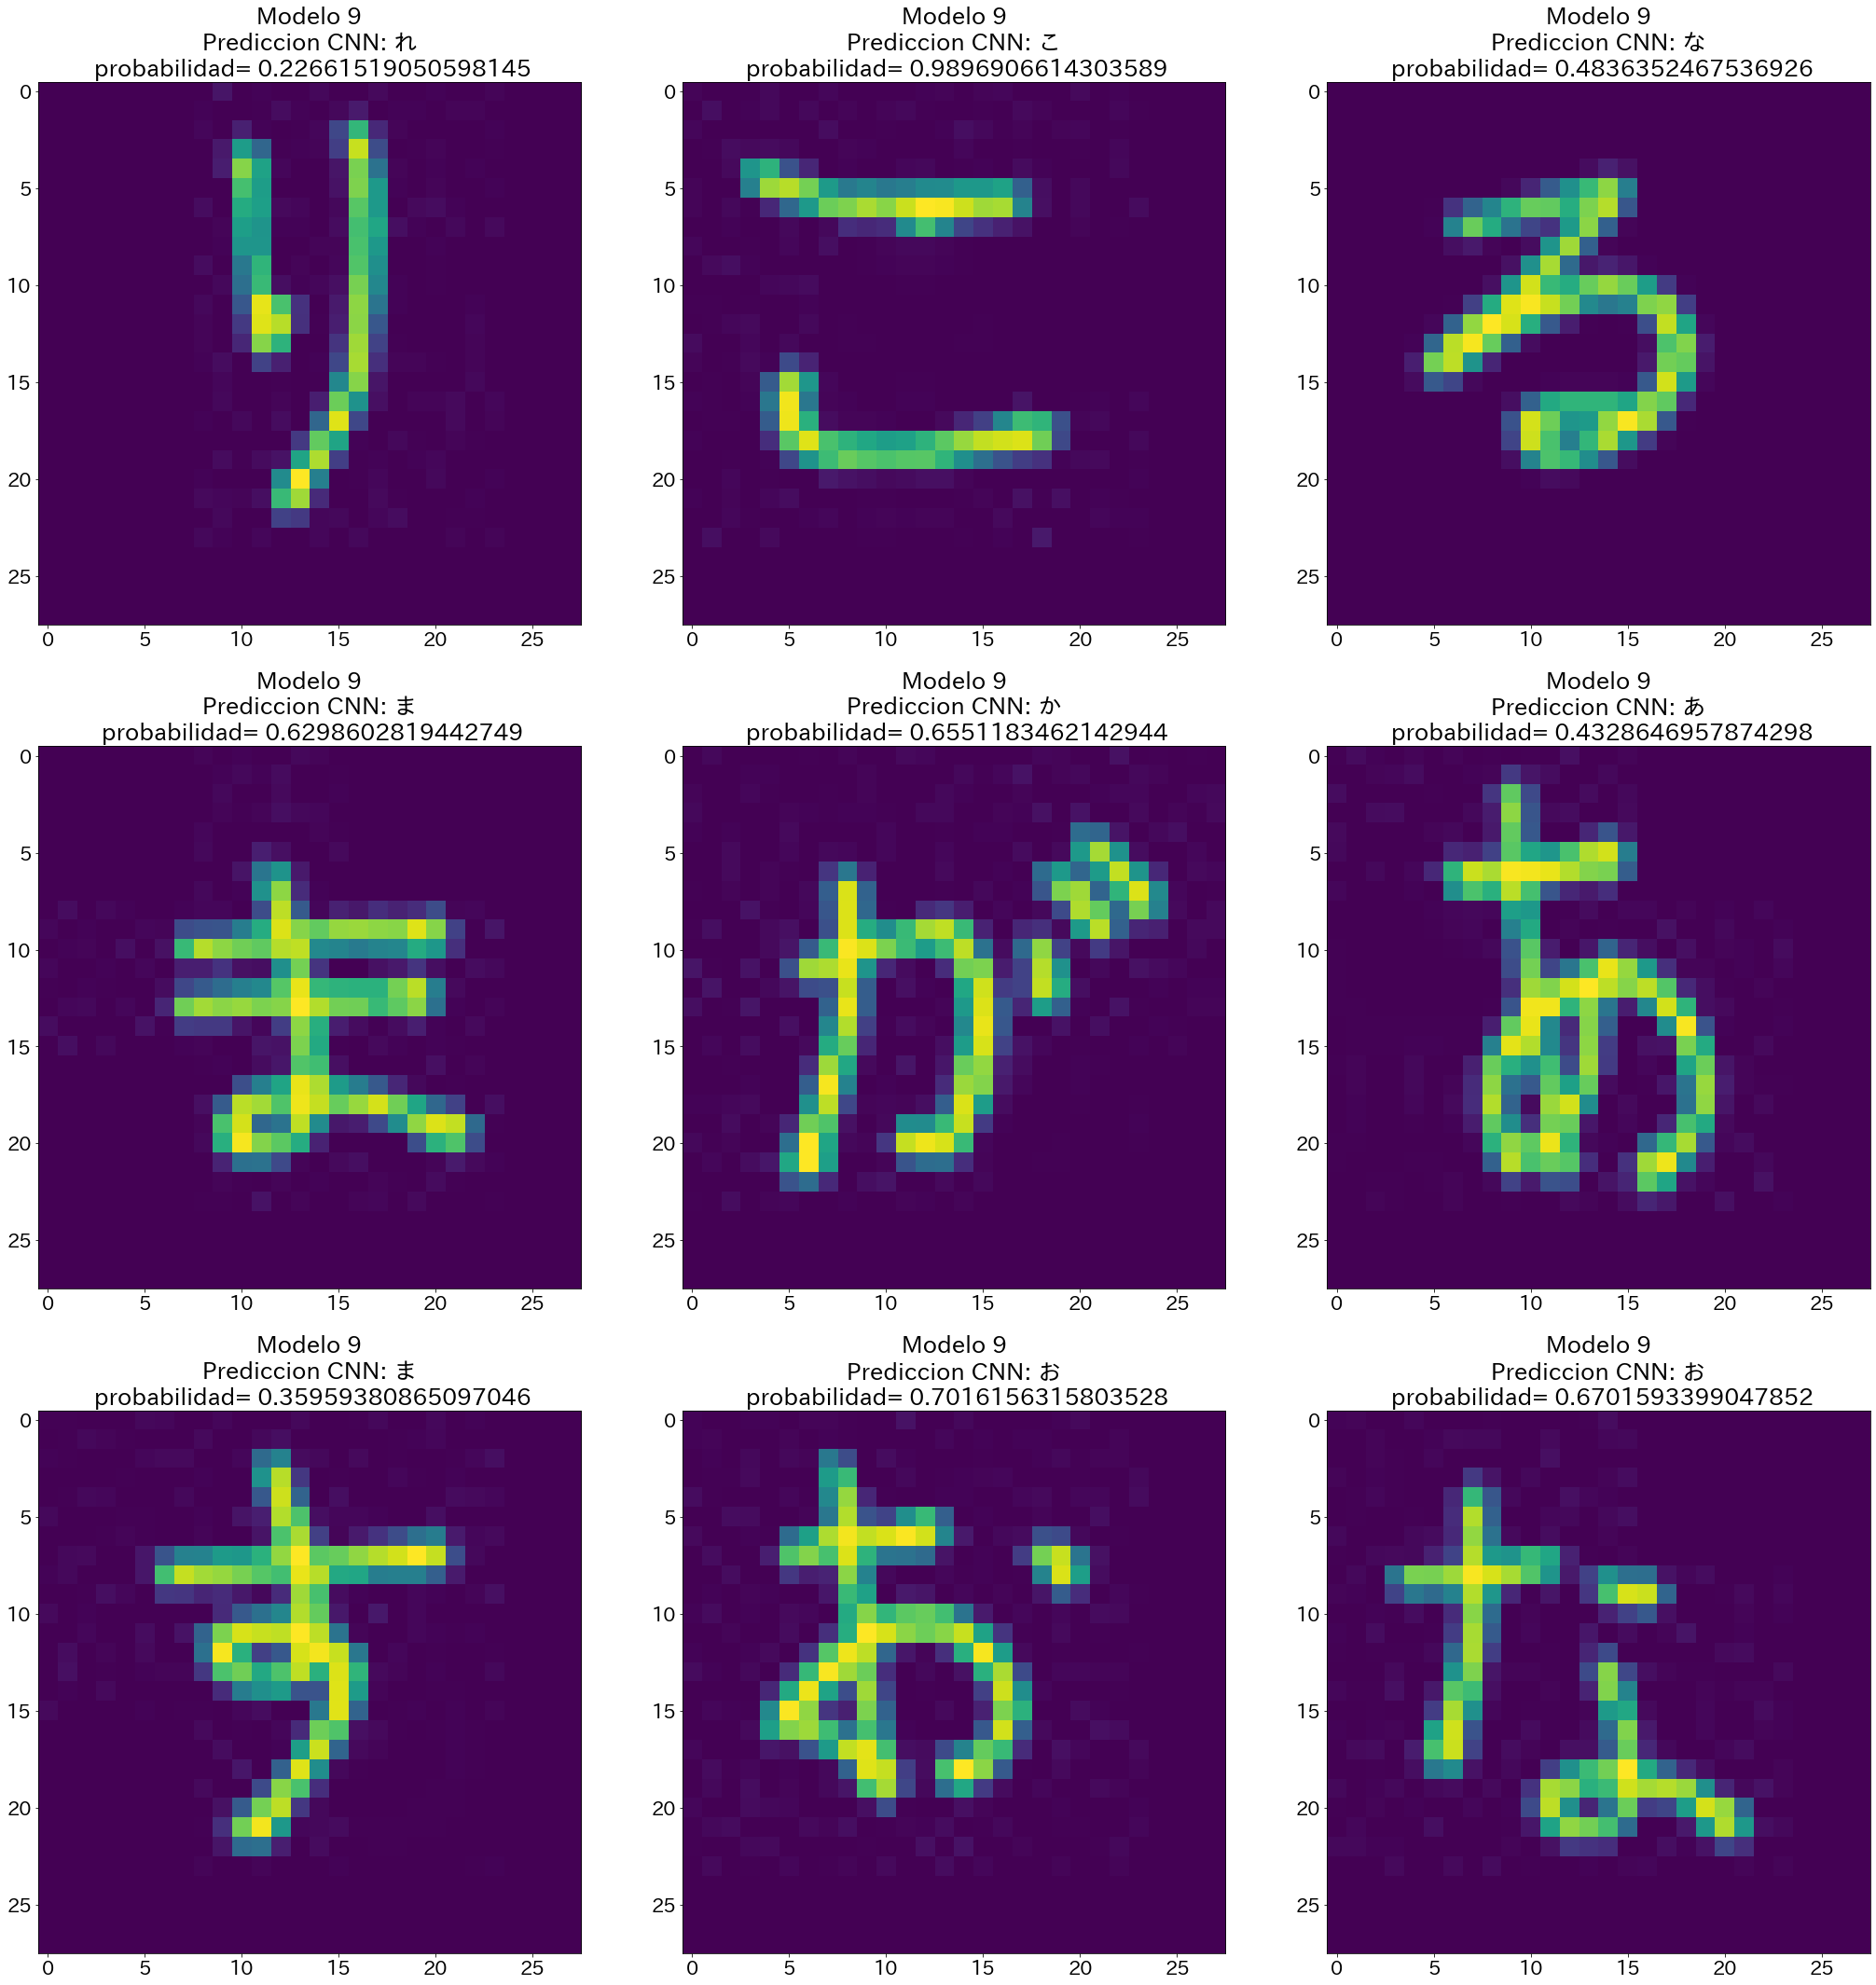

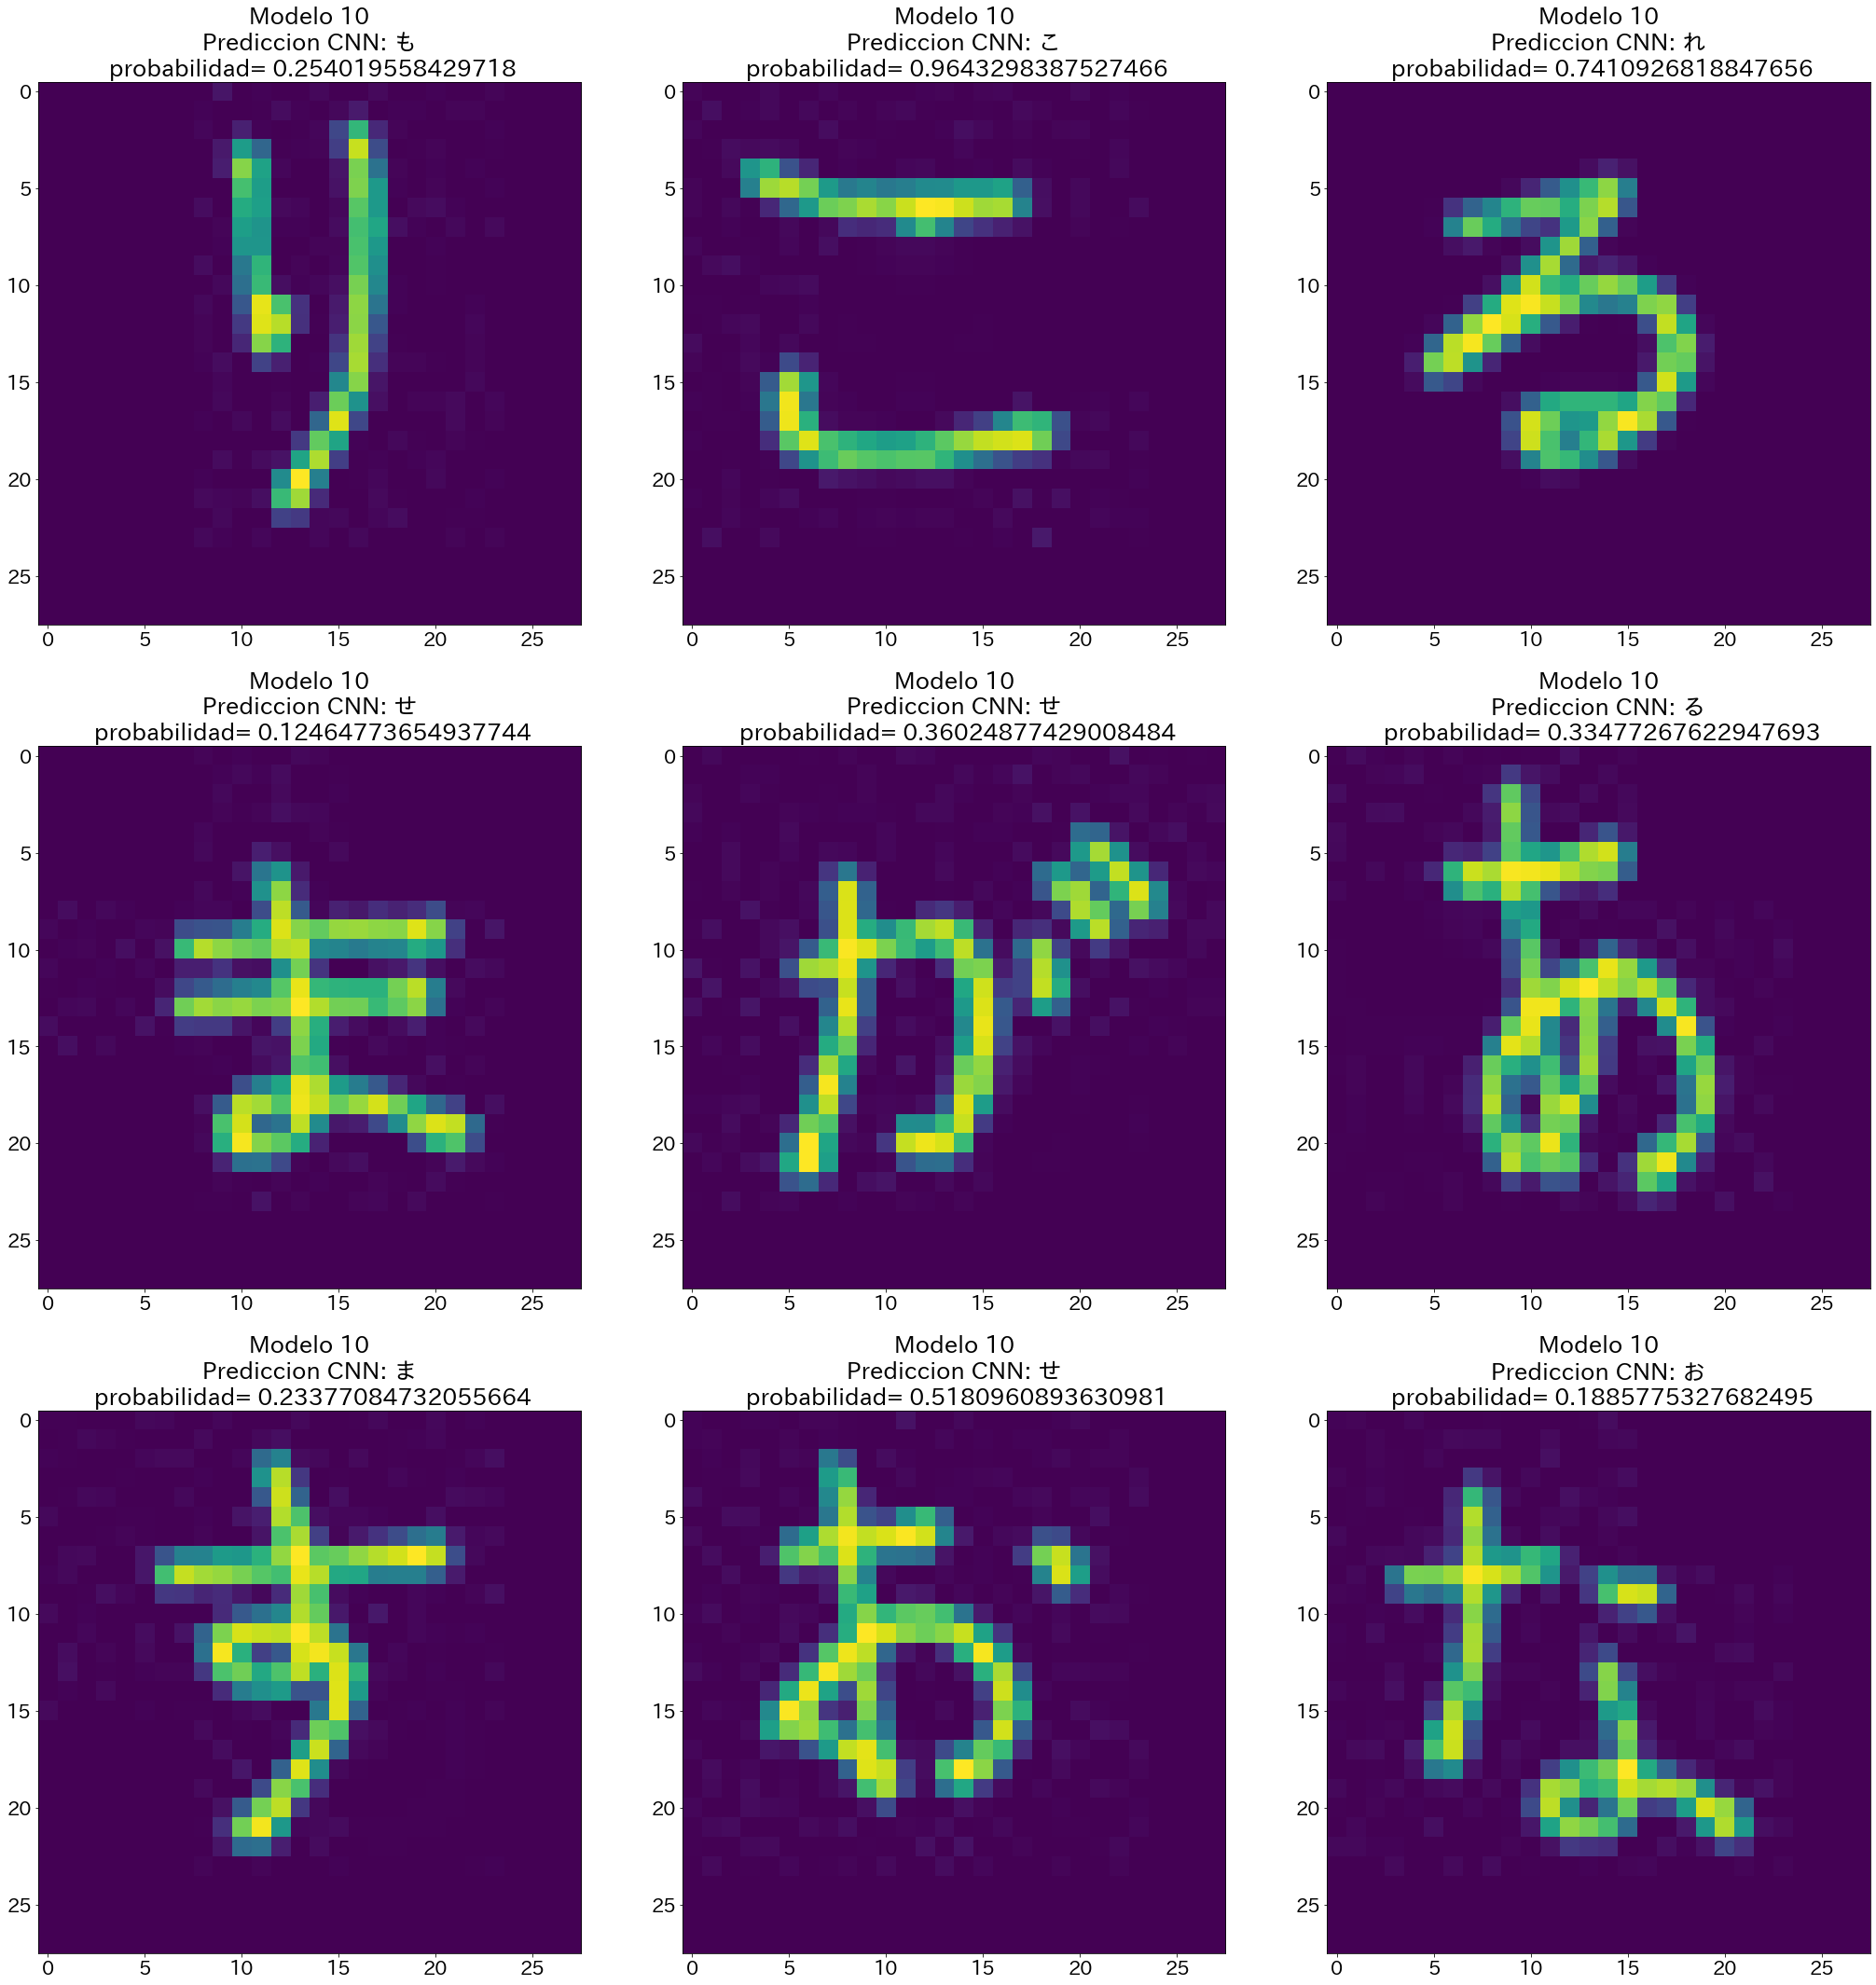

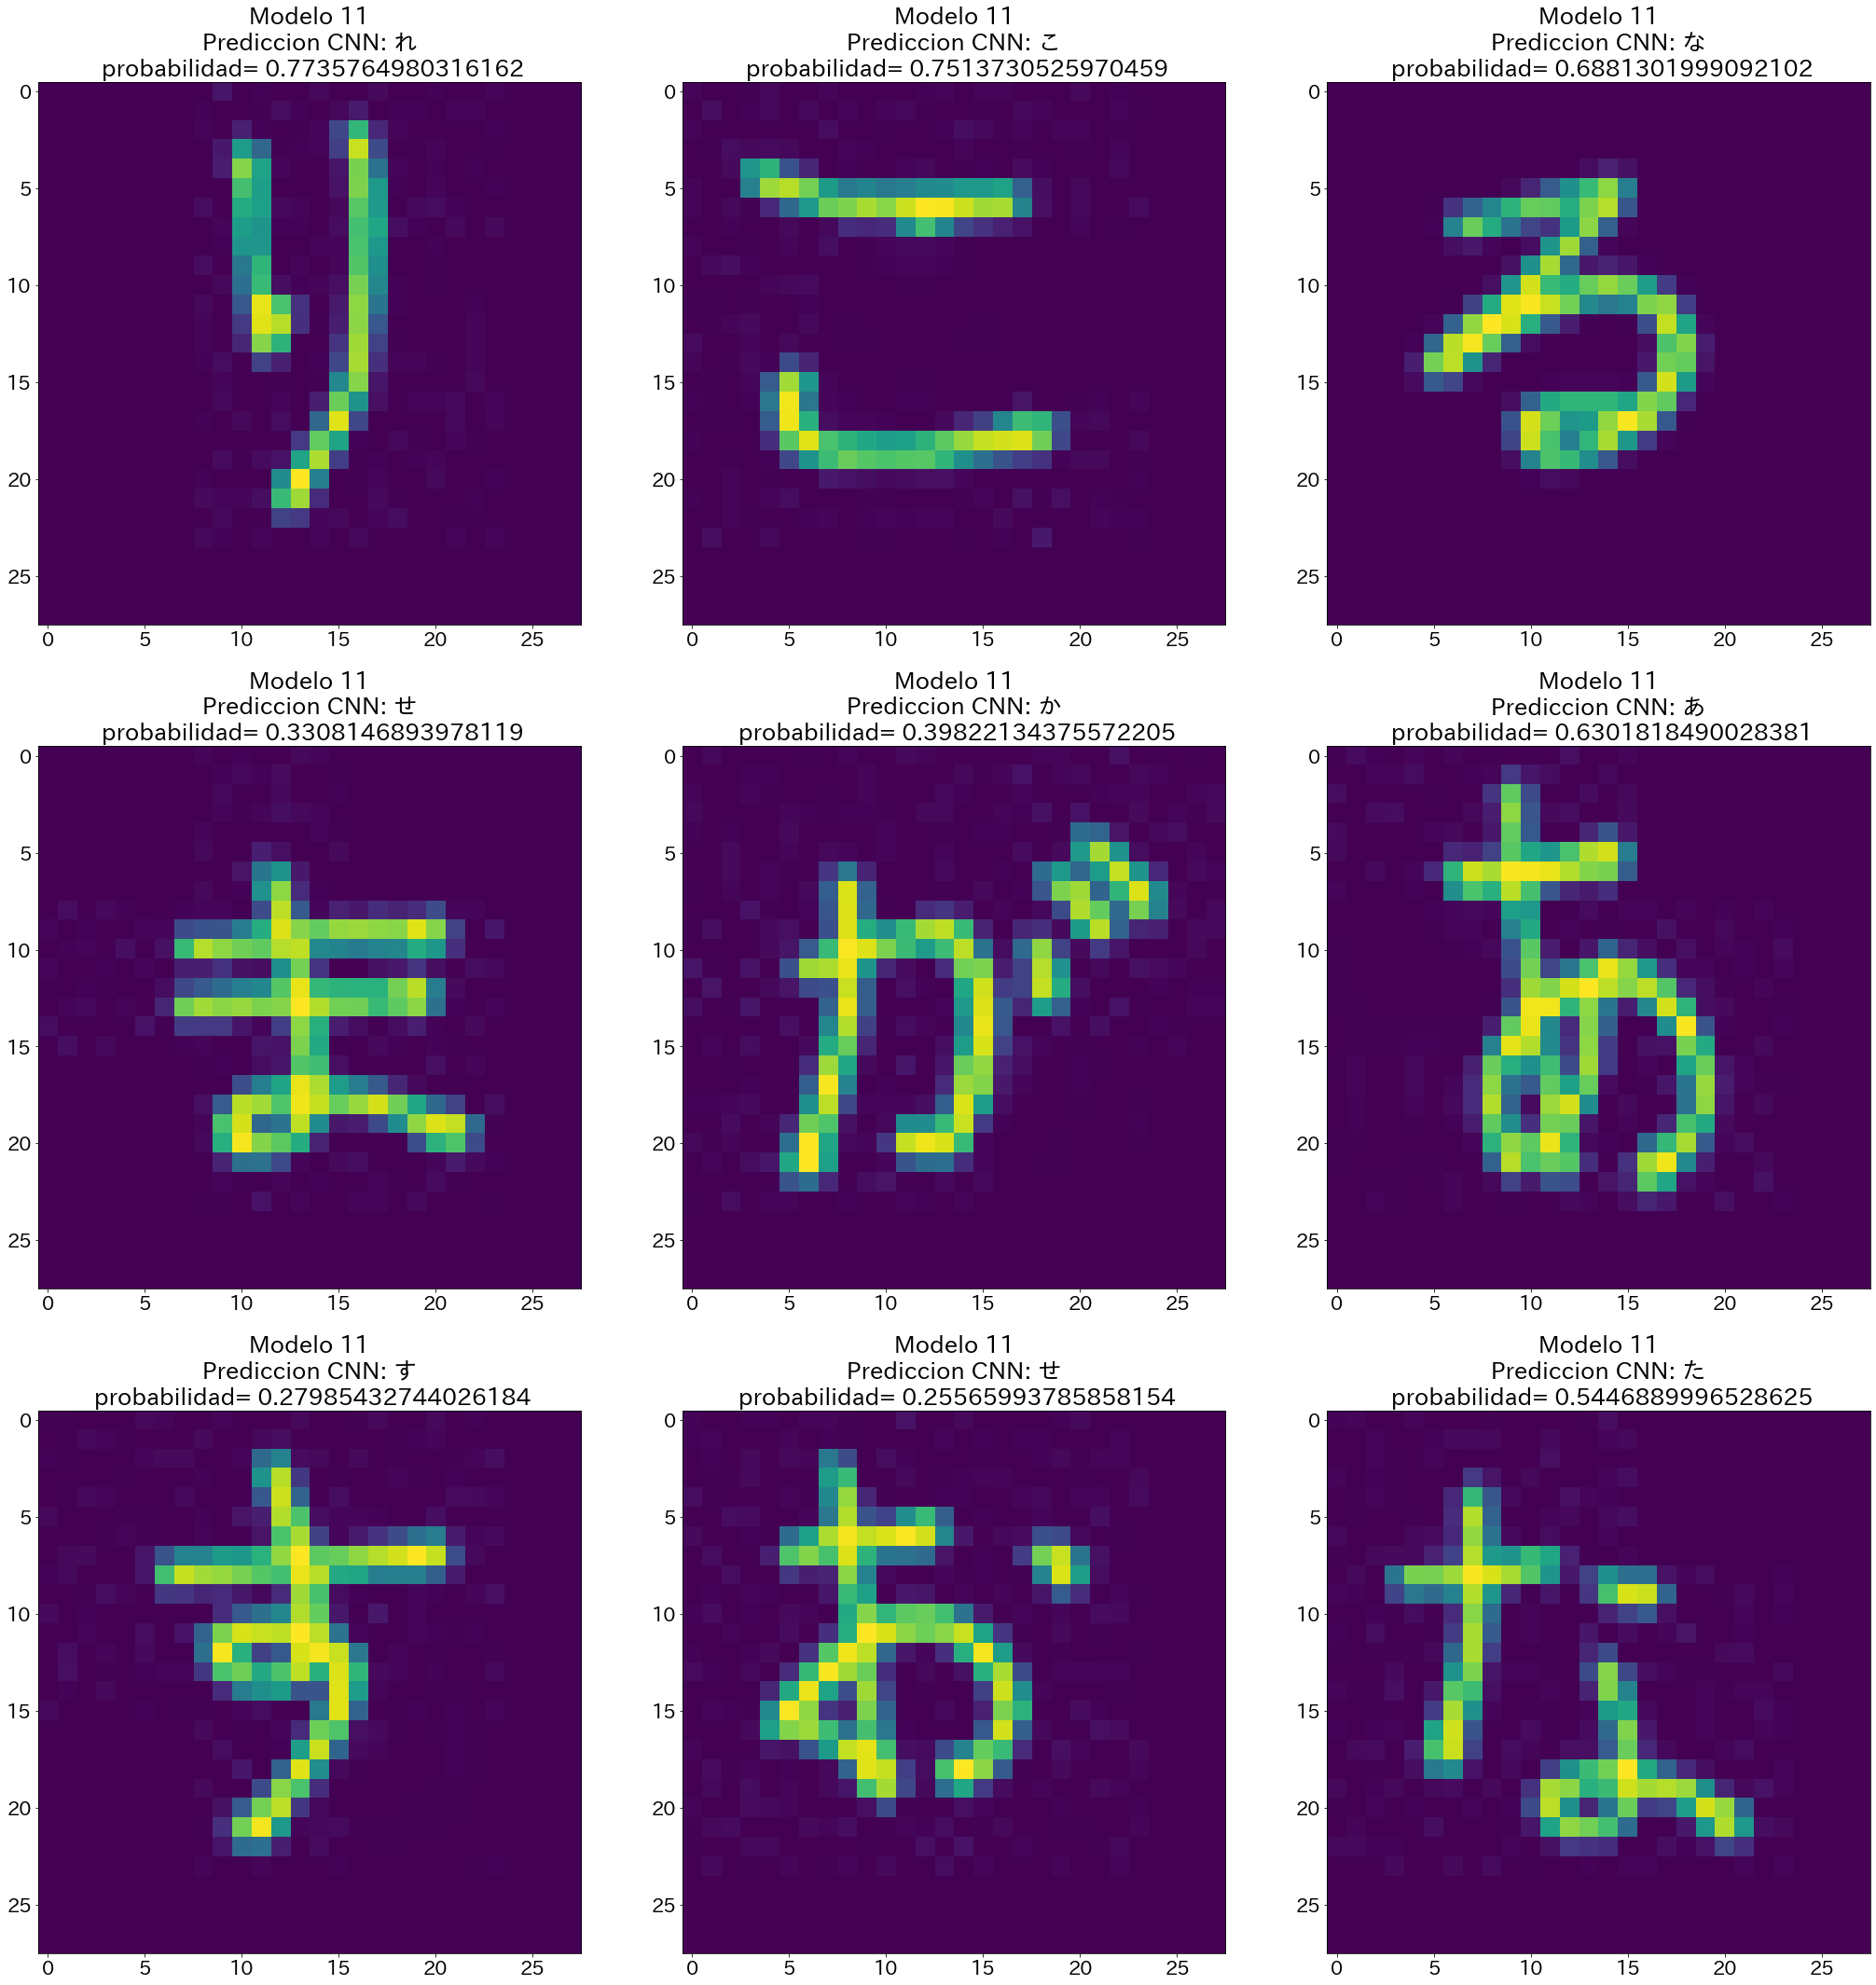

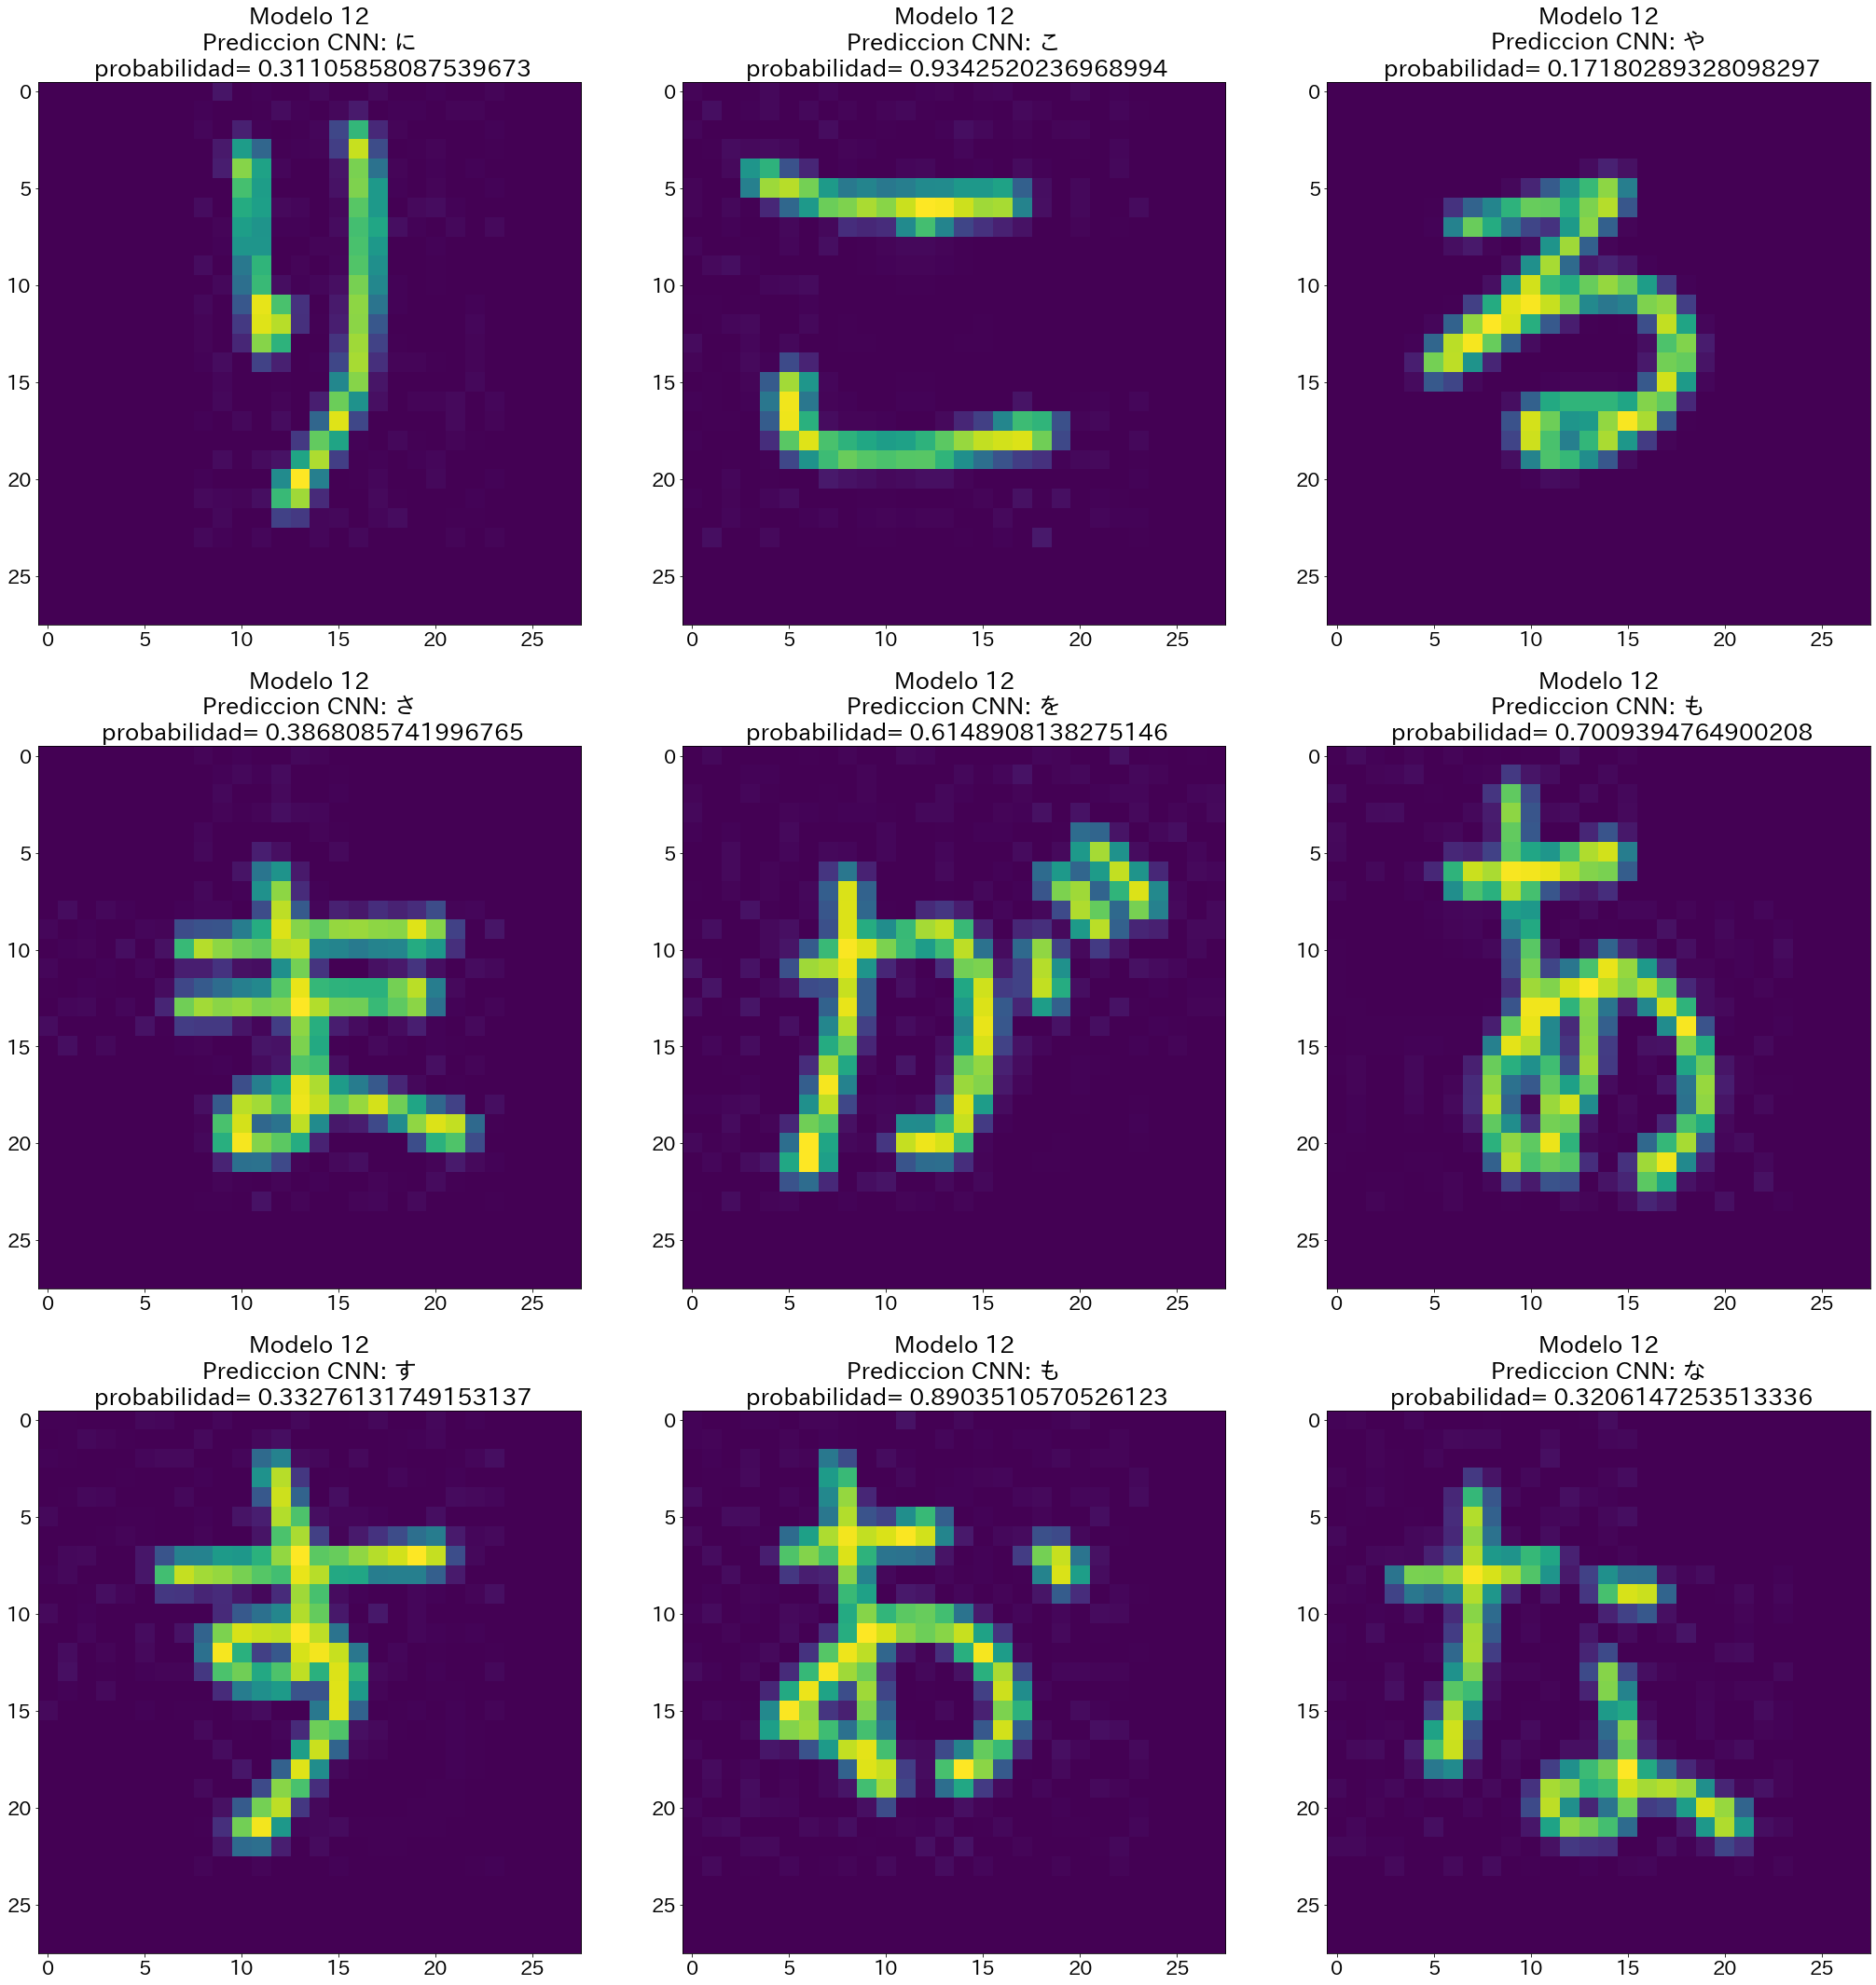

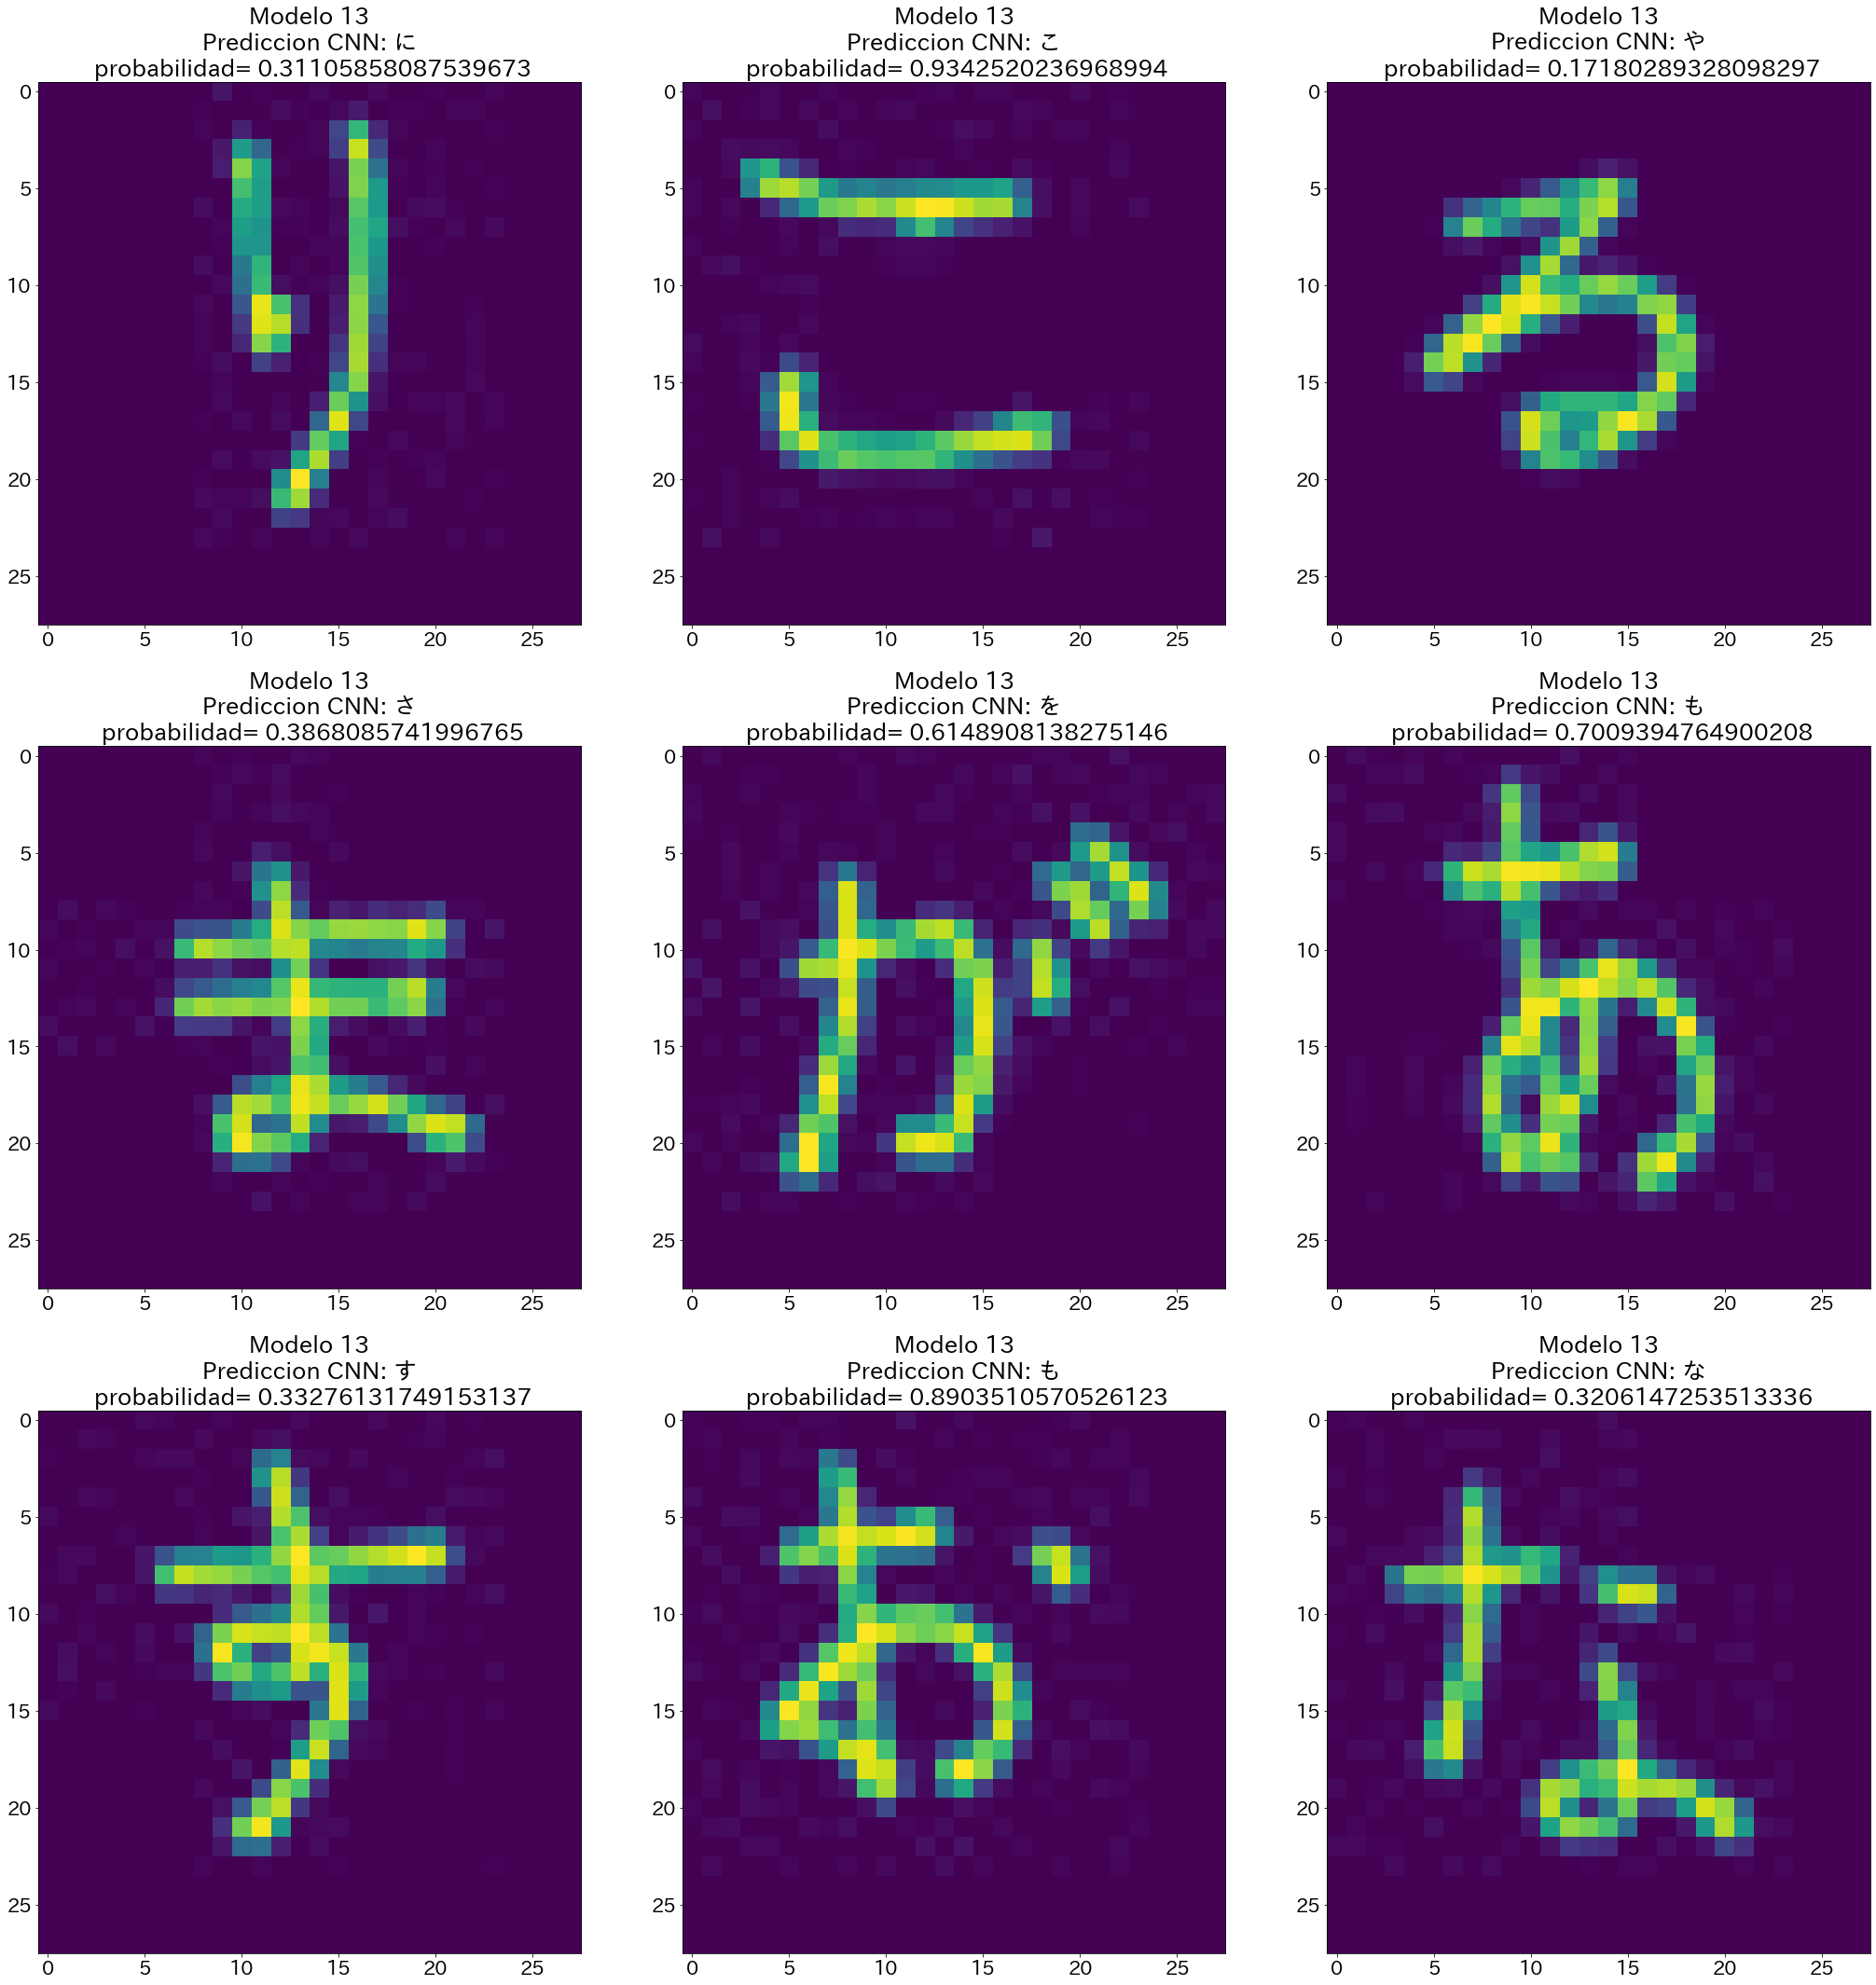

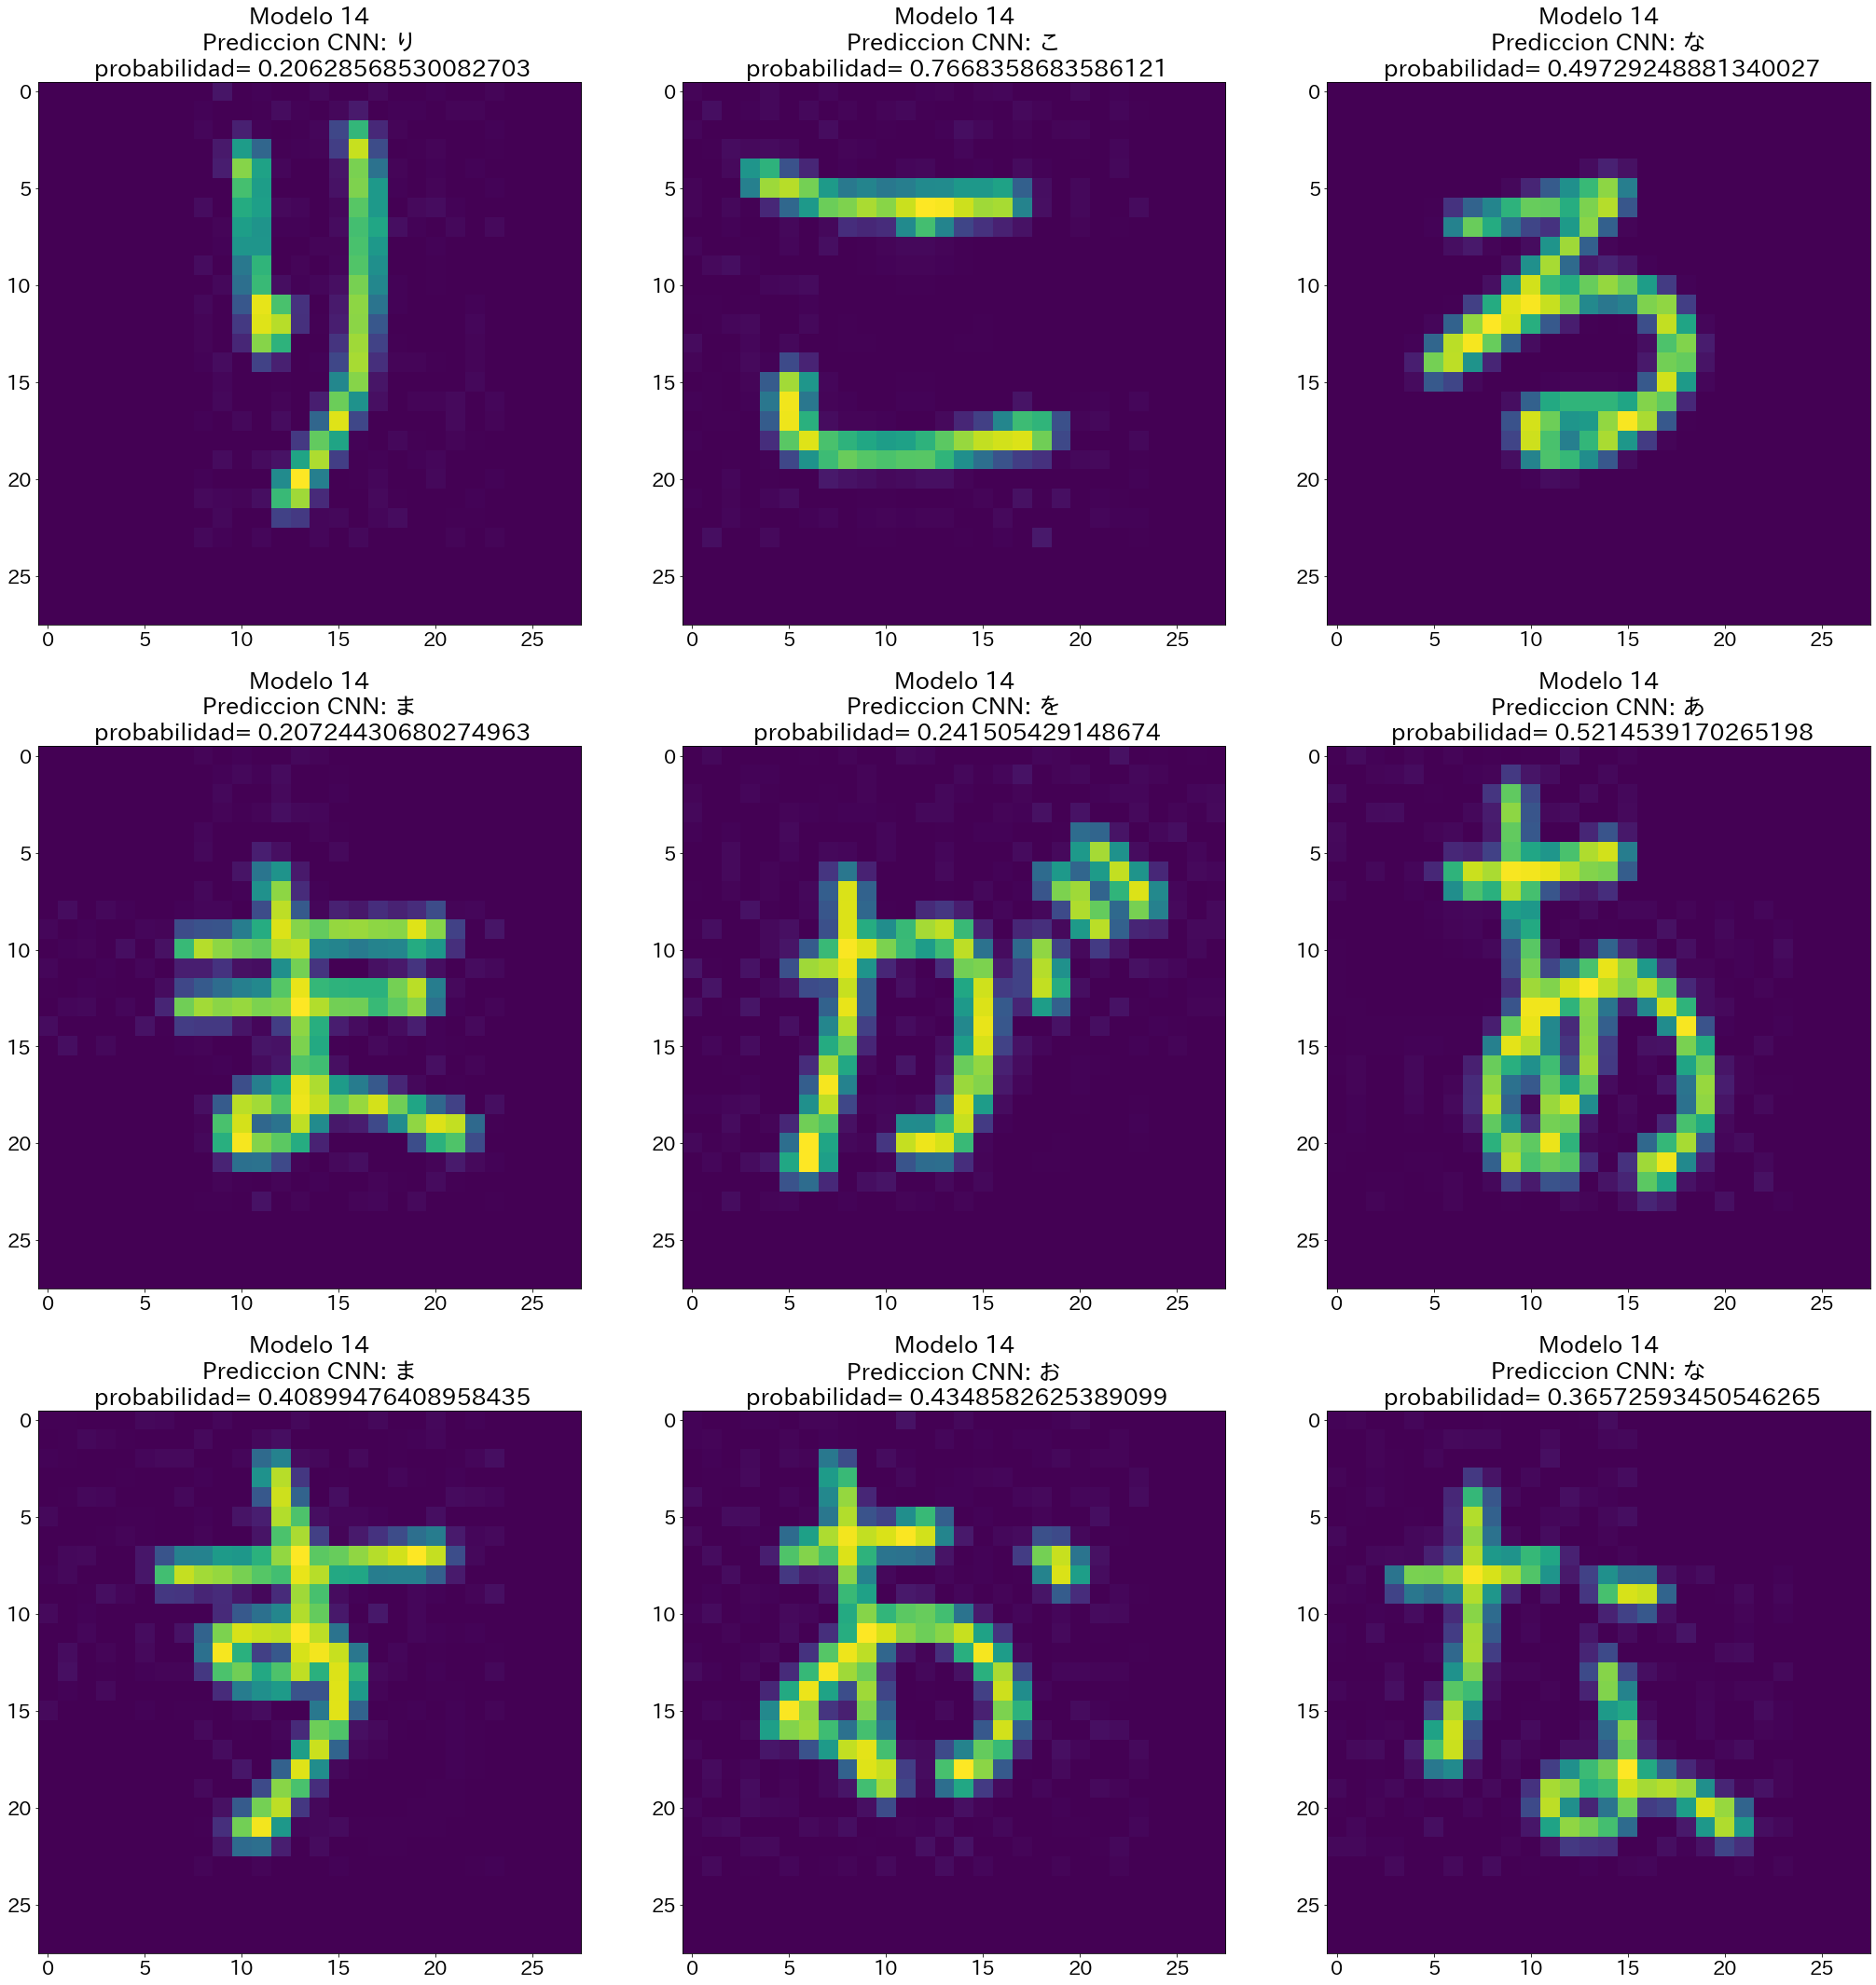

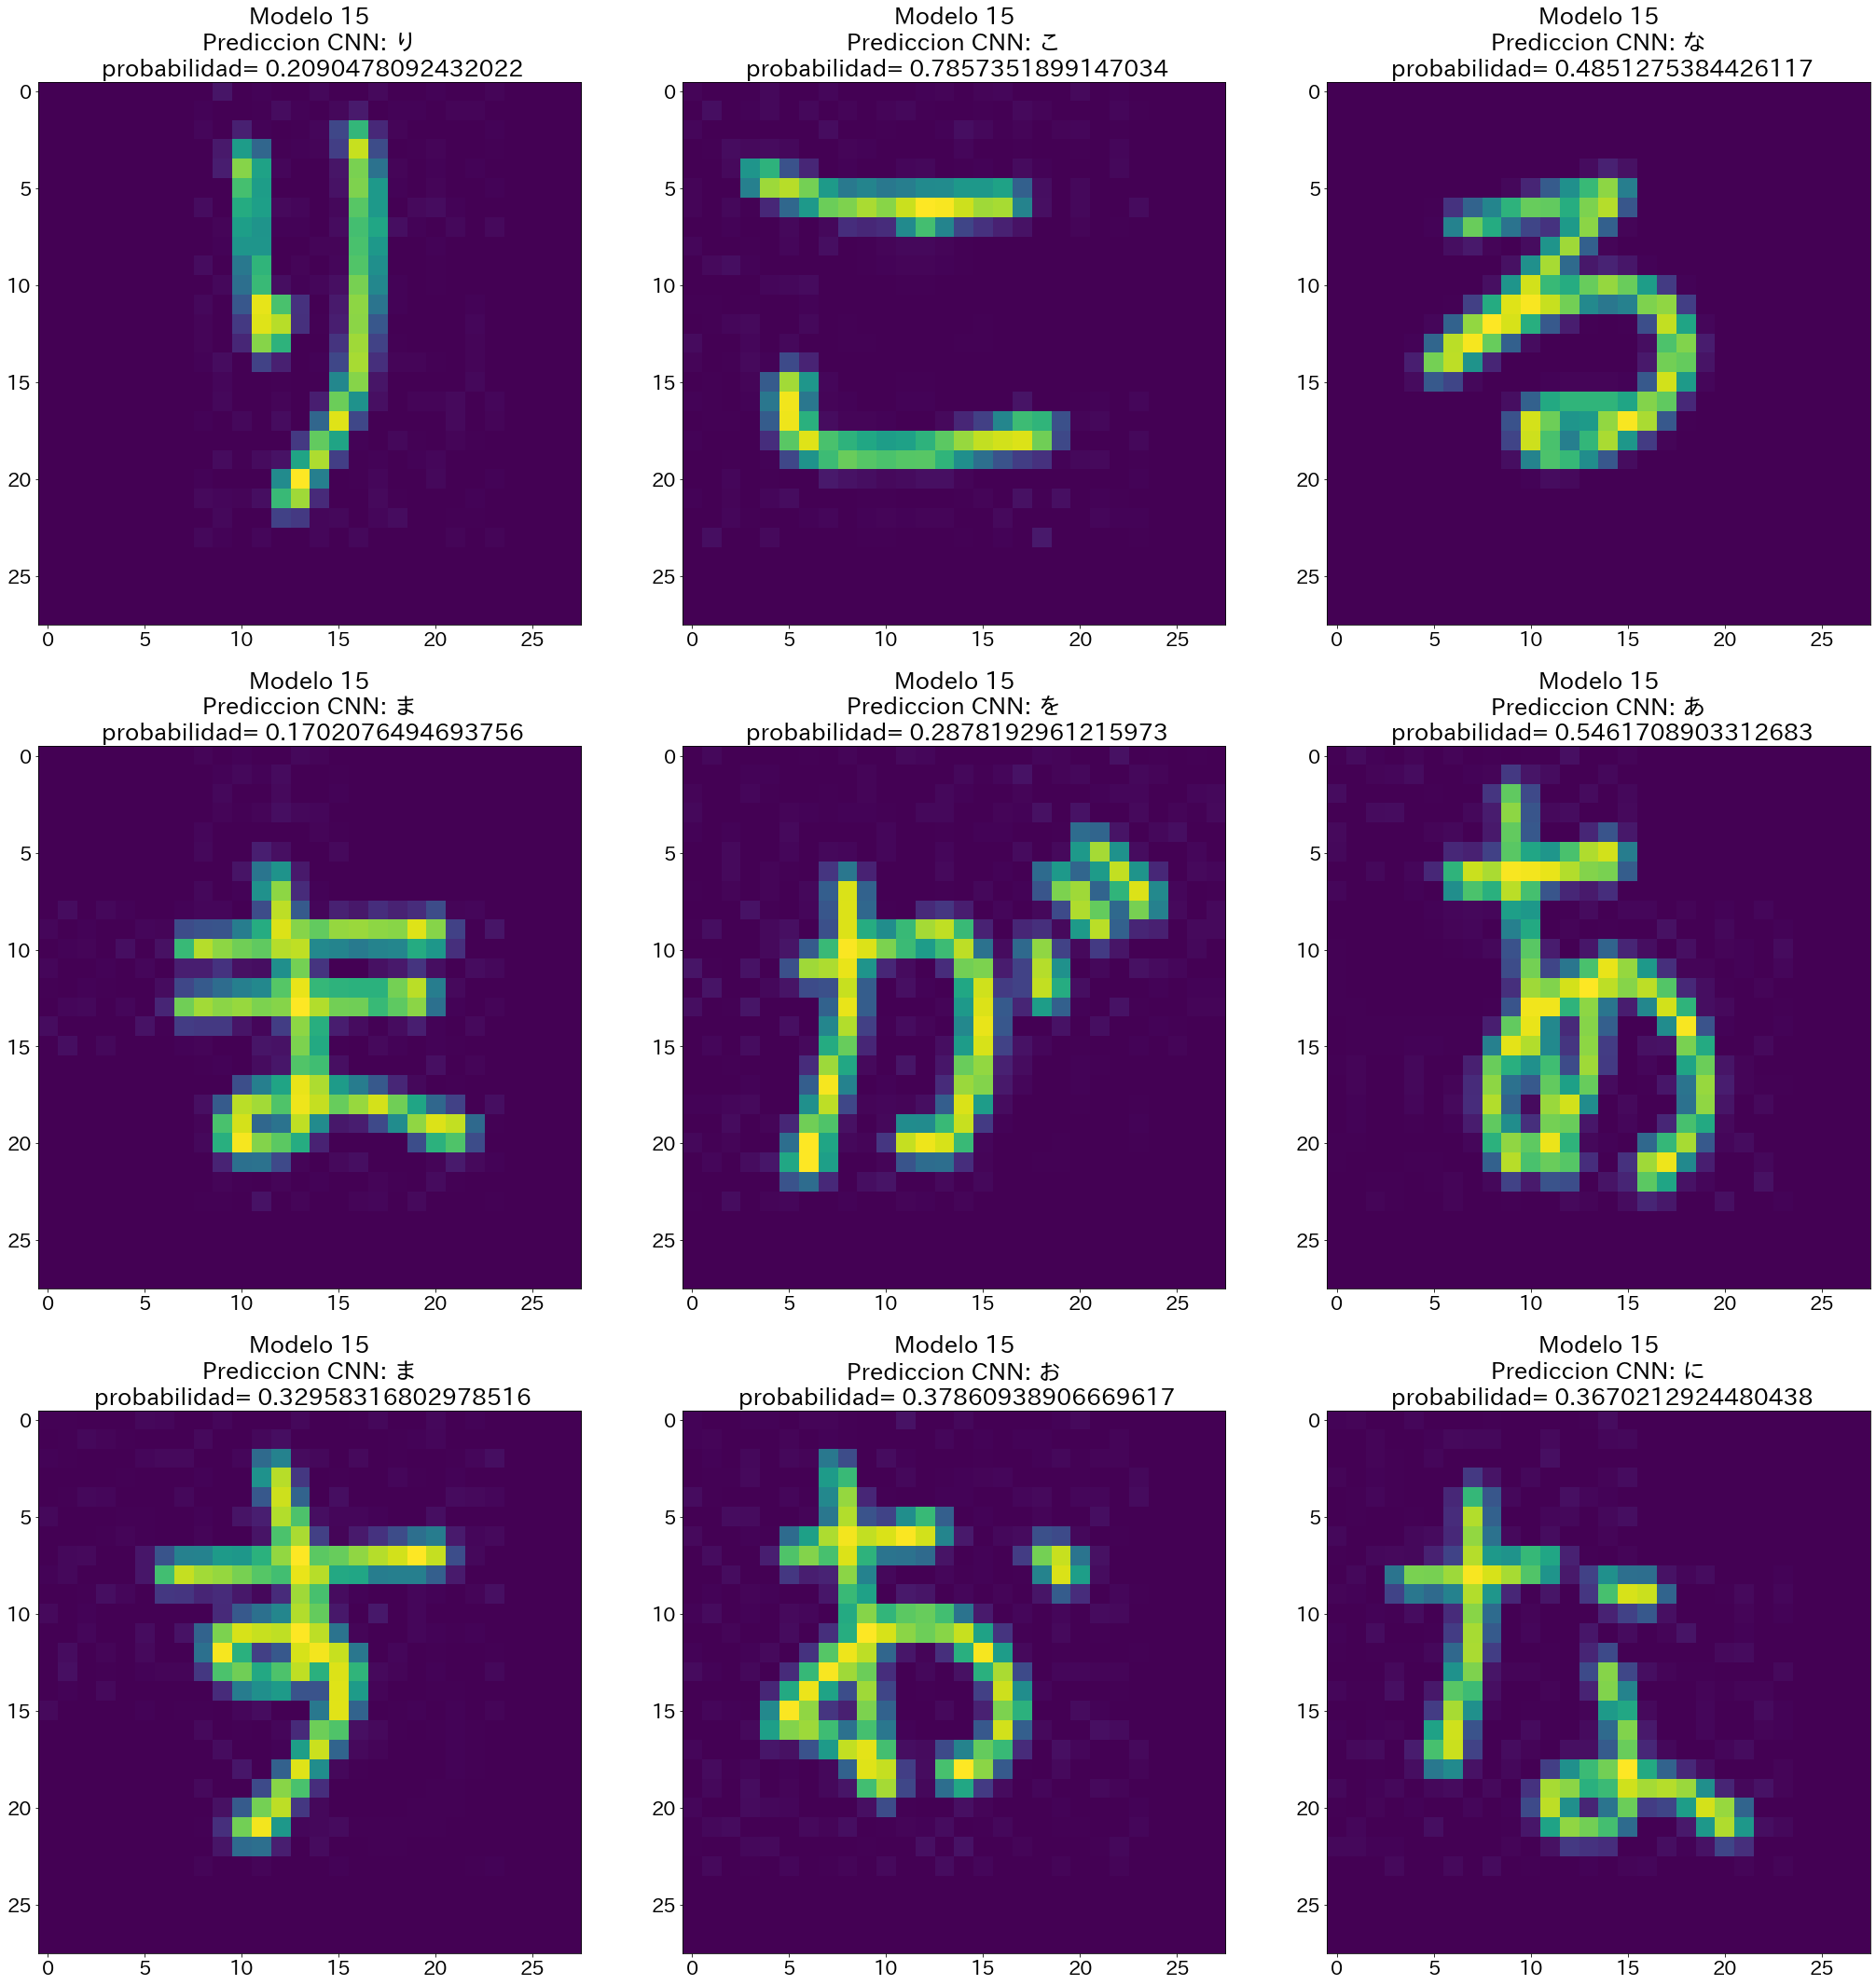

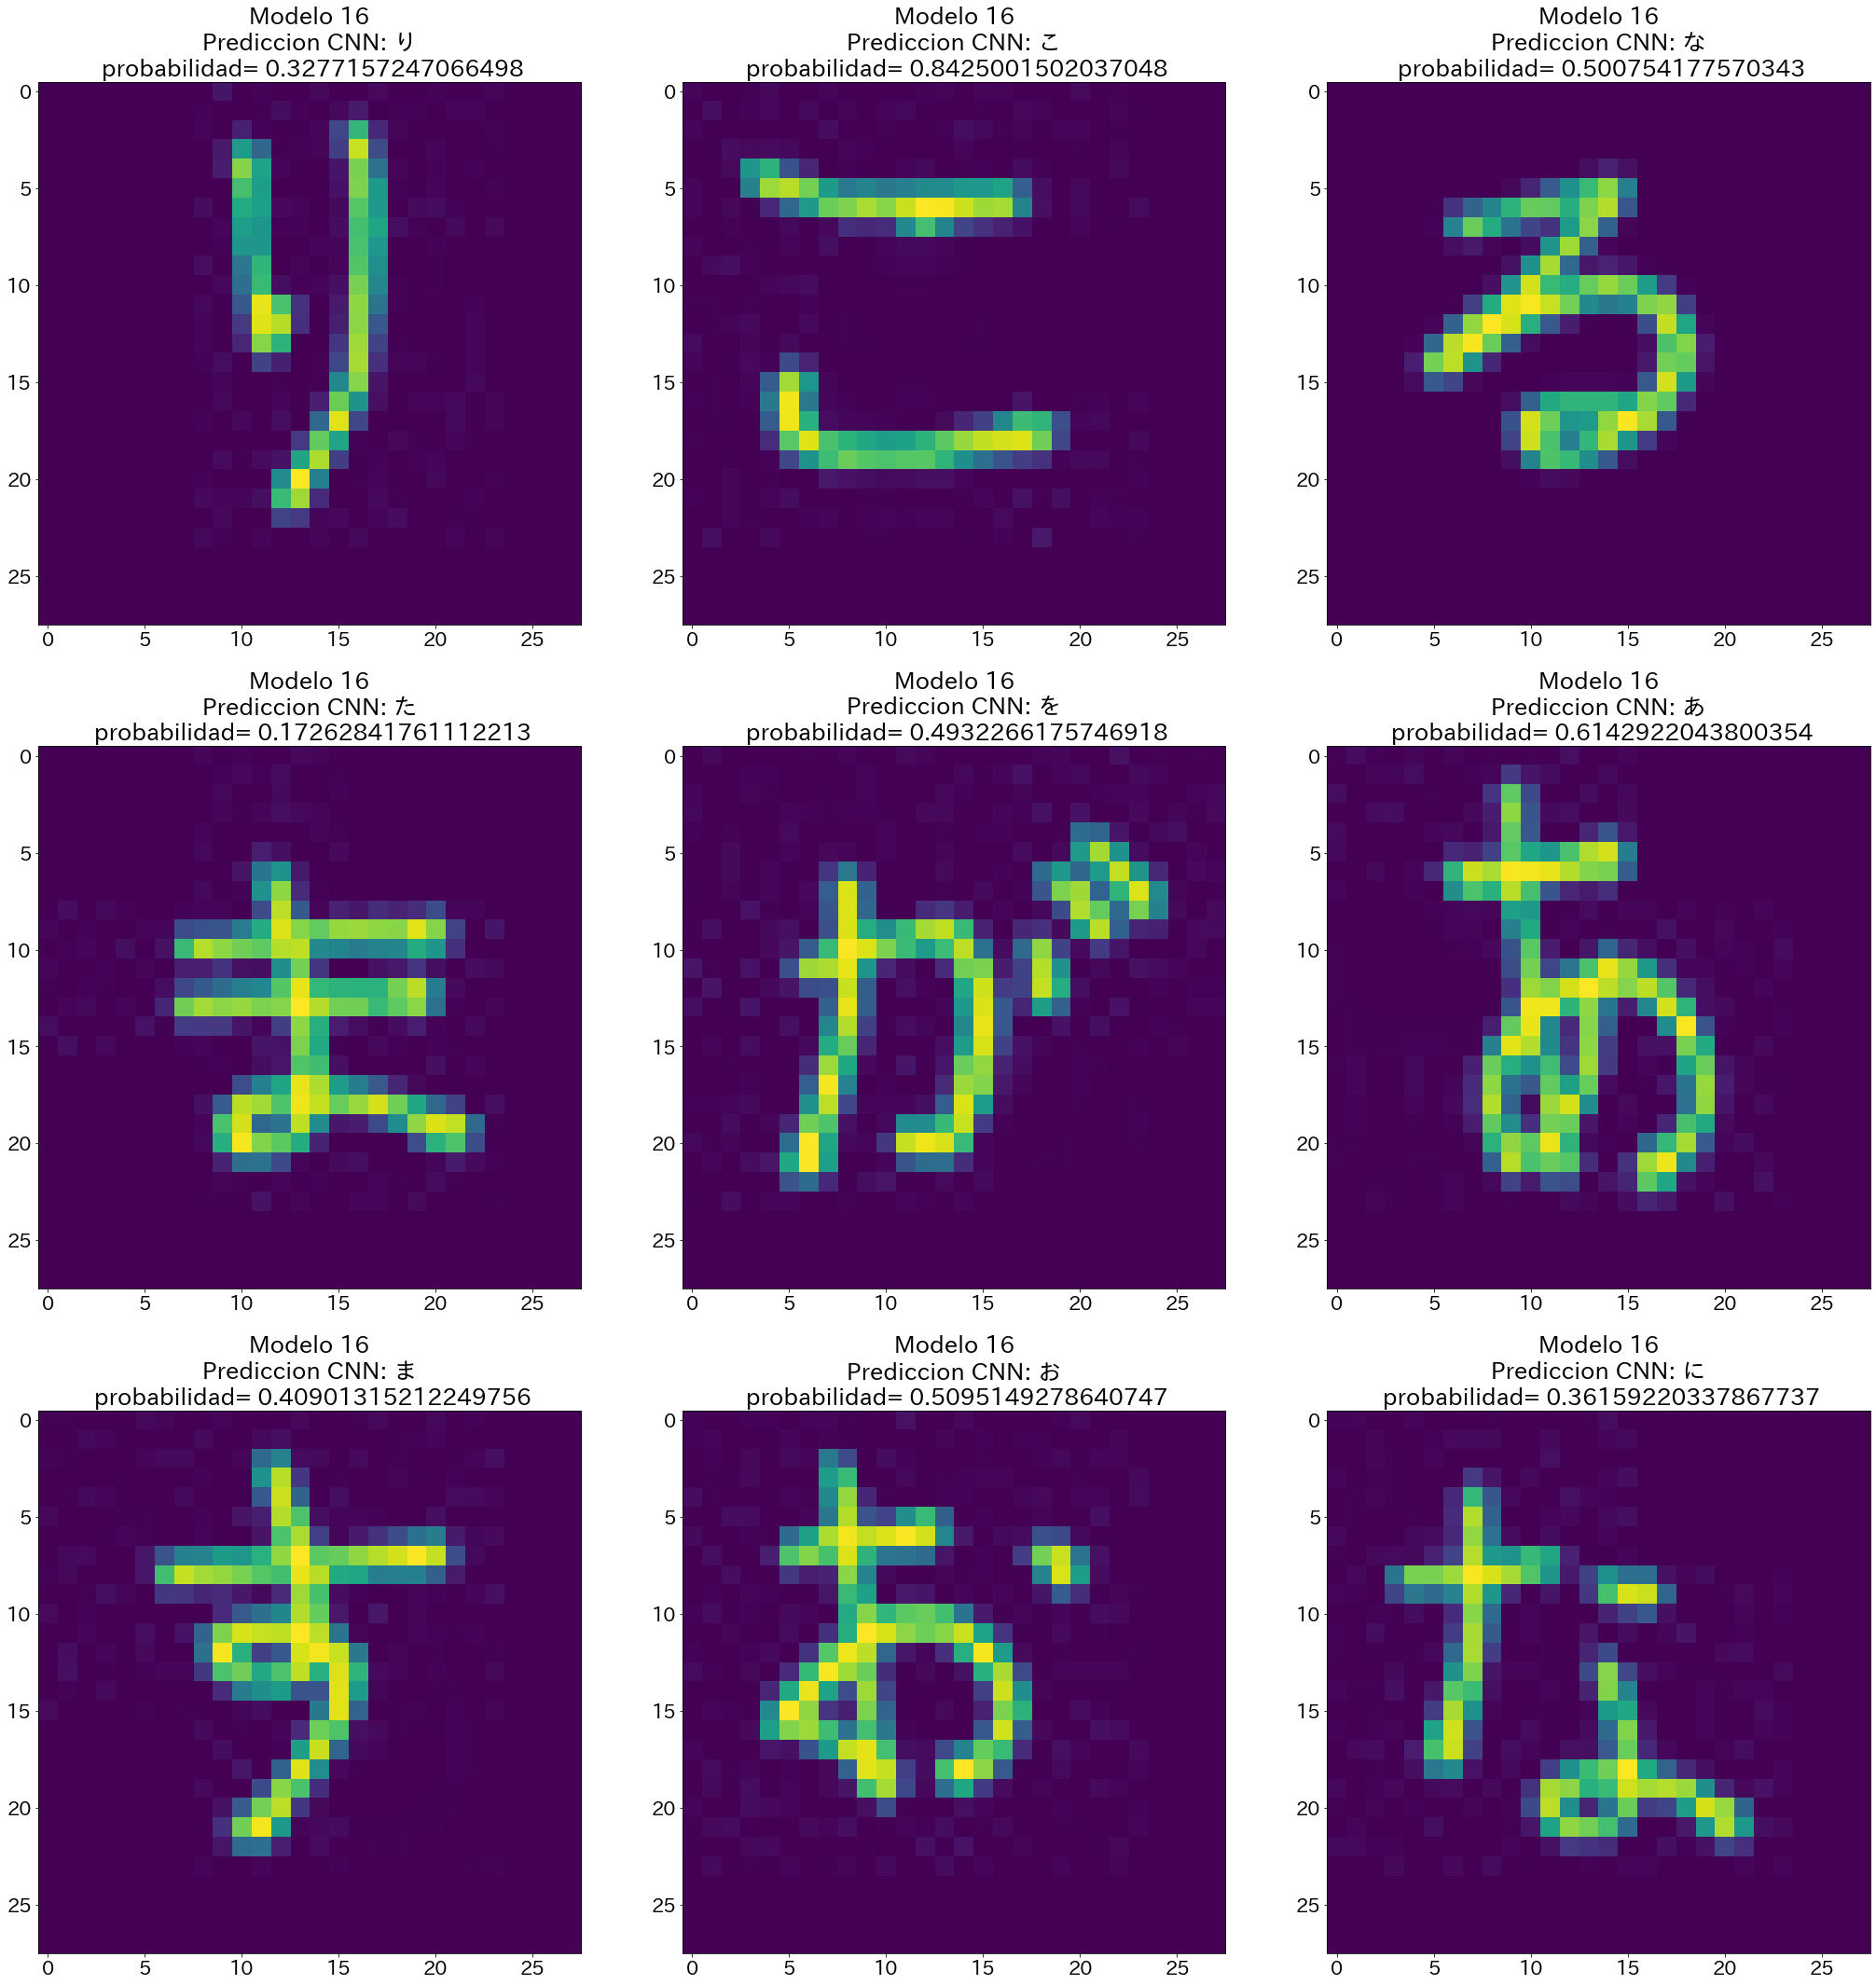

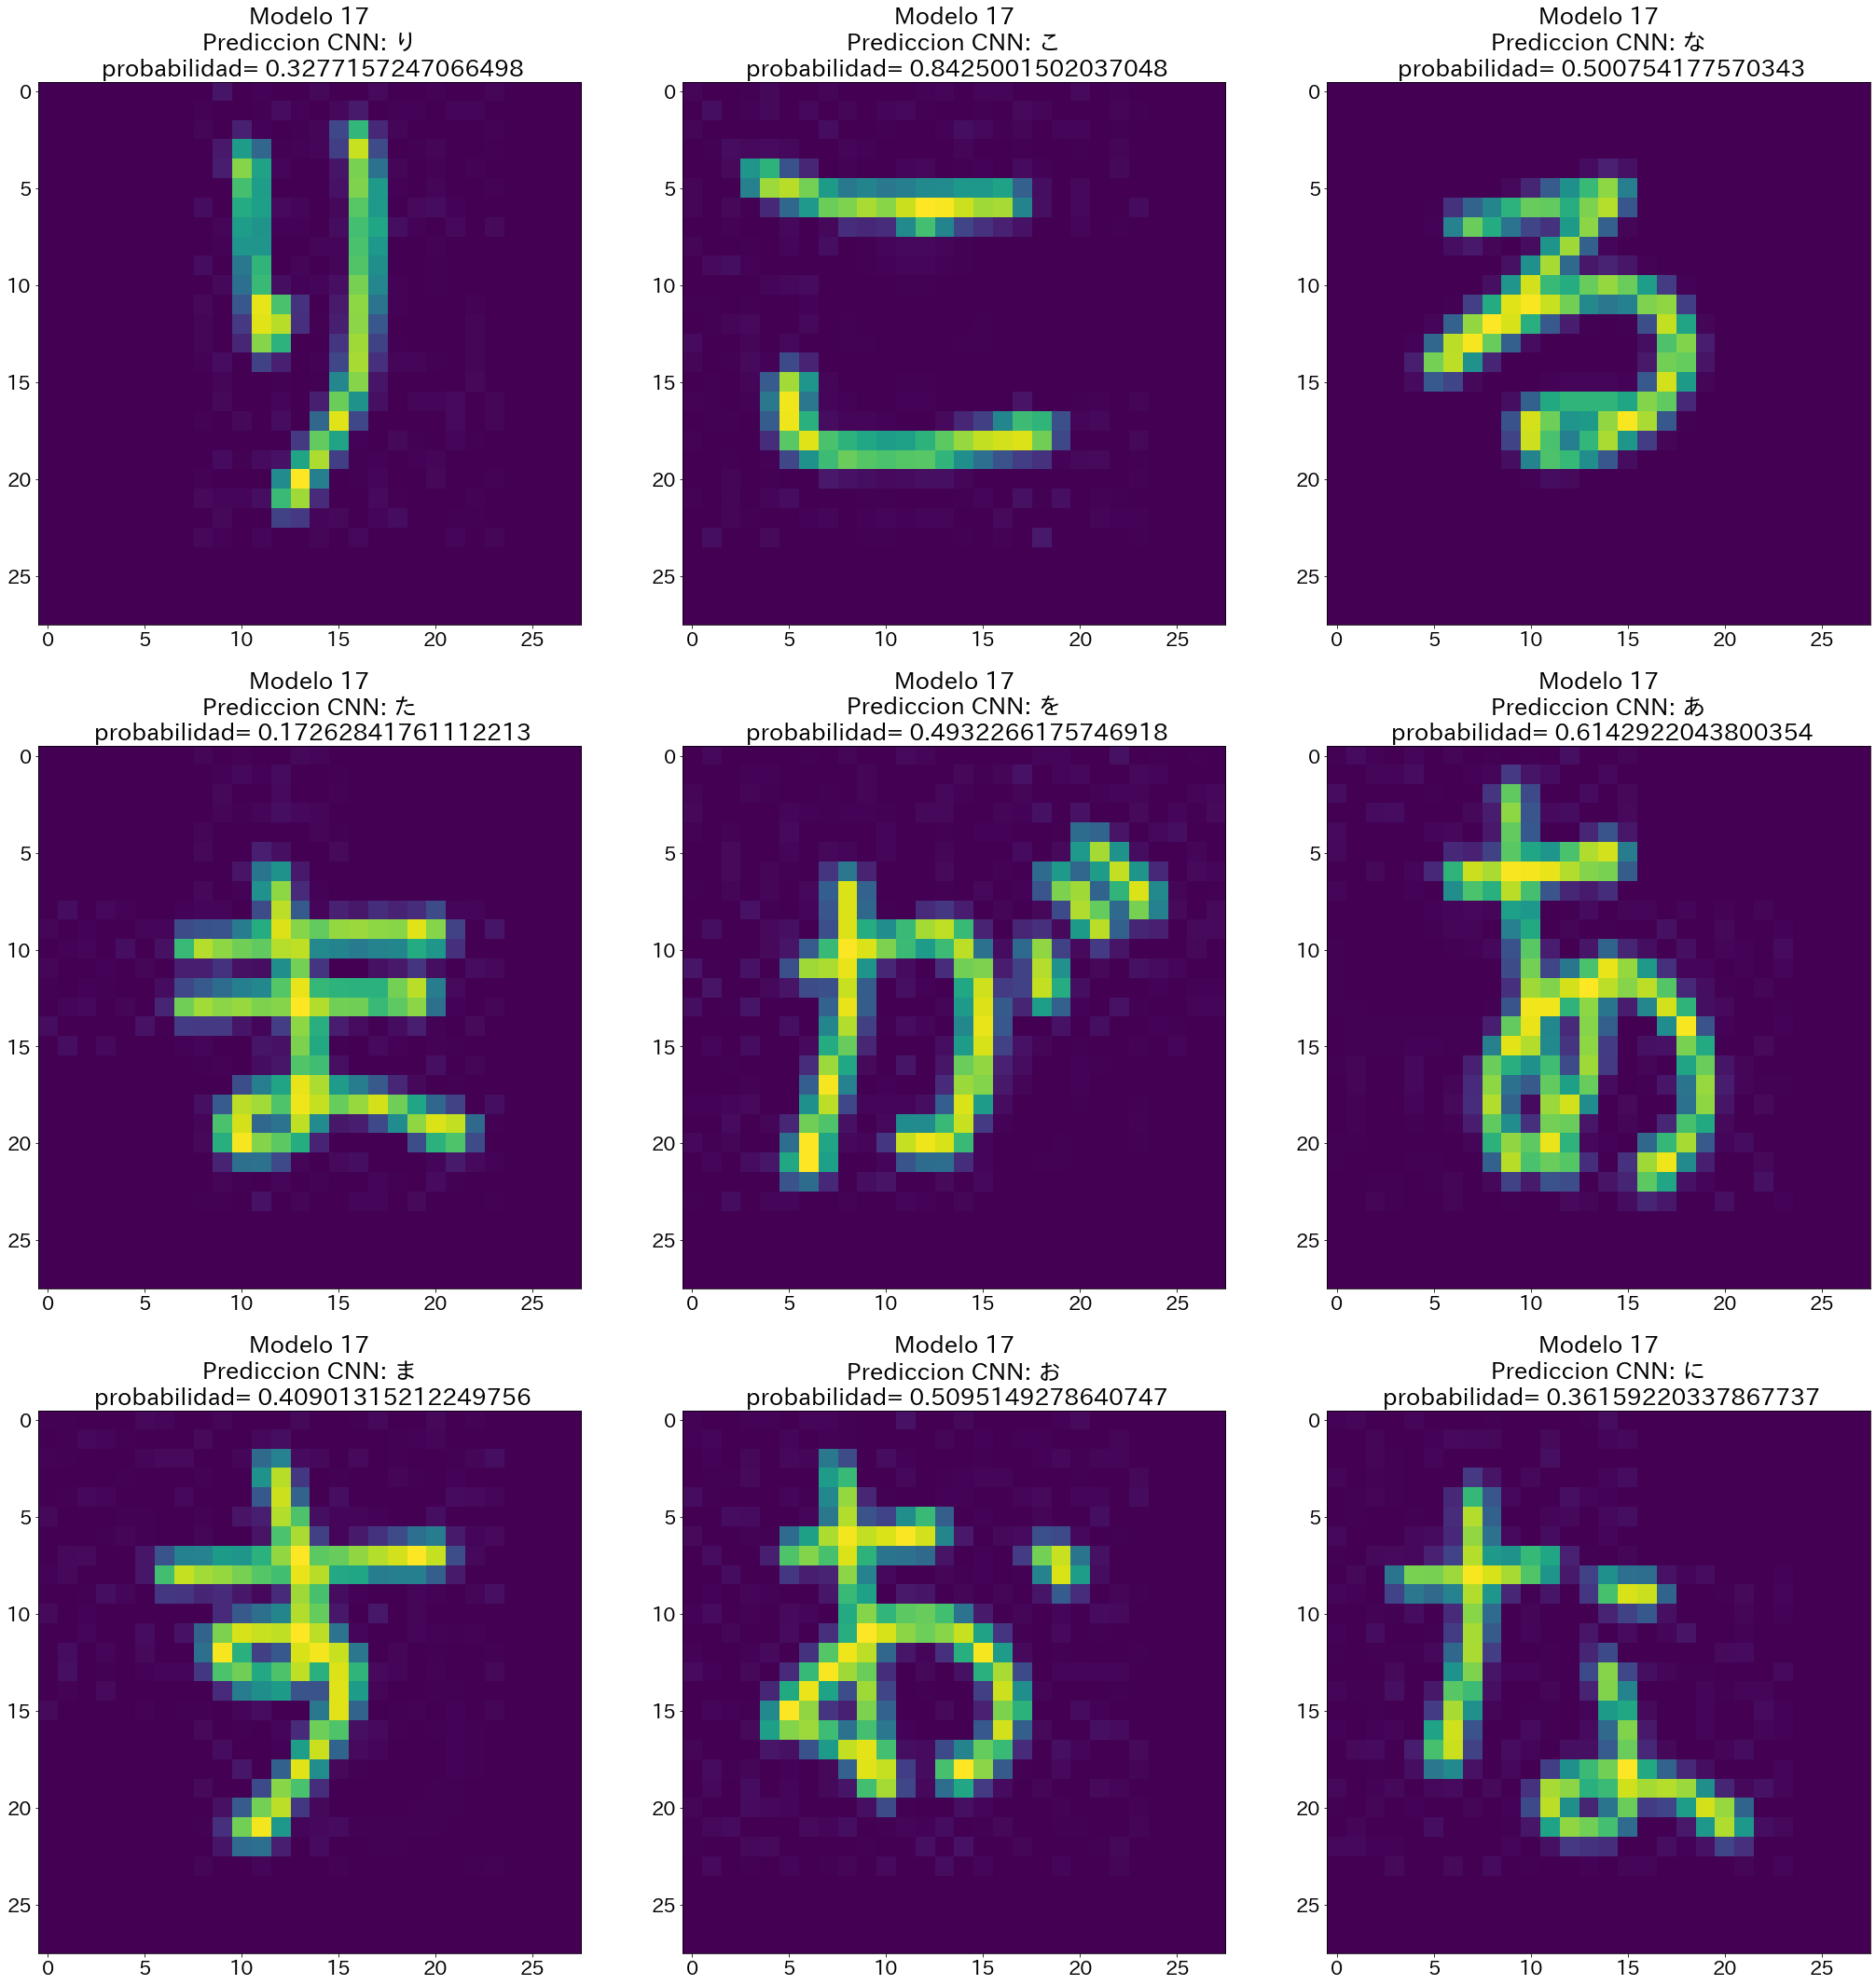

In [47]:
%cd /content/random_projects/prueba_cnn/
reshaped_binarised_images=(np.array([cv2.imread(file,-1) for file in os.listdir() if file[-4:]== '.jpg'])/255).reshape(-1,28,28,1)
refs=pd.read_csv('/content/dataset/k49_classmap.csv')
for x,model in enumerate(modelos):
  preds=model.predict(np.array(reshaped_binarised_images))
  fig,ax=plt.subplots(3,3,figsize=(30,30))
  ax=ax.flatten()
  for n,image in enumerate(reshaped_binarised_images):
    ax[n].imshow(image[:,:,0])
    # softmax=model.predict(image)
    pred,proba = np.argmax(preds[n]), preds[n].max()
    ax[n].set_title('Modelo {}\nPrediccion CNN: {}\n probabilidad= {}'.format(x,refs.loc[pred,'char'],proba))
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/cnn_japan/all_models/prediction_model_{}.png'.format(x))